In [1]:
from google.colab import files
uploaded = files.upload()

Saving BLS-T7.xlsx to BLS-T7.xlsx


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_excel('BLS-T7.xlsx')

# Print basic summary statistics for each variable
print(df.describe())




       Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  TotalUnableToWork
count       962.000000       962.000000         962.000000              962.0
mean      19667.382536       552.650728           3.184615              100.0
std       33275.424346       982.686813           2.667891                0.0
min         524.000000         1.000000           0.100000              100.0
25%        4737.500000        93.250000           1.500000              100.0
50%        9078.500000       232.500000           2.300000              100.0
75%       16436.250000       526.750000           3.900000              100.0
max      155797.000000      8253.000000          17.900000              100.0


In [4]:
# Check for missing values in each variable
print(df.isnull().sum())



Characteristic       0
Total Civilian       0
TotalEmpLaidOff      0
PercentEmpLaidOff    0
ReceivedPay          0
NotReceivedPay       0
TotalUnableToWork    0
ReceivedPay.1        0
NotReceivedPay.1     0
Month                0
dtype: int64


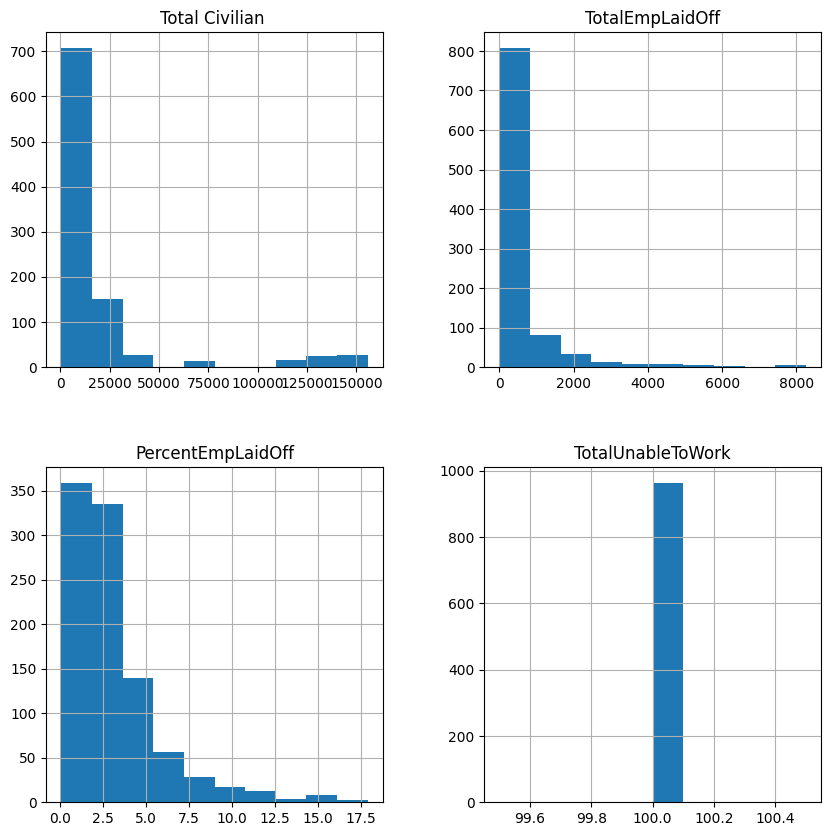

In [5]:
#histogram of each variable's distribution
df.hist(figsize=(10,10))
plt.show()



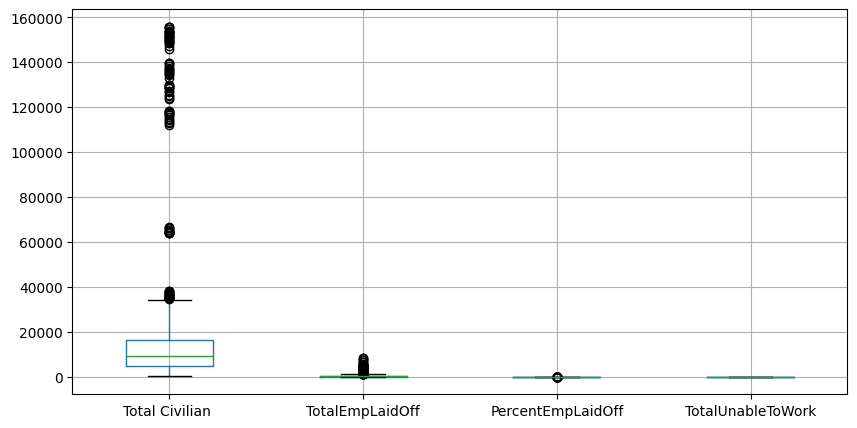

In [6]:
# Create a boxplot of each variable to identify outliers
df.boxplot(figsize=(10,5))
plt.show()



In [7]:
# Calculate the correlation between pairs of variables
print(df.corr())



                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000         0.841729          -0.083345   
TotalEmpLaidOff           0.841729         1.000000           0.213546   
PercentEmpLaidOff        -0.083345         0.213546           1.000000   
TotalUnableToWork              NaN              NaN                NaN   

                   TotalUnableToWork  
Total Civilian                   NaN  
TotalEmpLaidOff                  NaN  
PercentEmpLaidOff                NaN  
TotalUnableToWork                NaN  


In [8]:
# Create a crosstabulation of two categorical variables
print(pd.crosstab(df['Characteristic'], df['Month']))



Month                                               2021-01  2021-02  2021-03  \
Characteristic                                                                  
Agriculture and related industries                        1        1        1   
Management, professional, and related occupations         1        1        1   
Natural resources, construction, and maintenanc...        1        1        1   
Nonagricultural industries                                1        1        1   
Production, transportation, and material moving...        1        1        1   
...                                                     ...      ...      ...   
       Utilities                                          1        1        1   
       Wholesale trade                                    1        1        1   
           Hospitals                                      1        1        1   
           Health services, except hospitals              1        1        1   
           Social assistance

In [11]:
print(df.columns)

Index(['Characteristic', 'Total Civilian ', 'TotalEmpLaidOff',
       'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay',
       'TotalUnableToWork', 'ReceivedPay.1', 'NotReceivedPay.1', 'Month'],
      dtype='object')


Correlation Analysis


In [13]:
import pandas as pd

# Read the data into a pandas DataFrame
df = pd.read_excel('BLS-T7.xlsx')

# Group the data by 'Characteristic'
grouped = df.groupby('Characteristic')

# Iterate over each group and calculate the correlation matrix
for name, group in grouped:
    print(f"Correlation matrix for group '{name}':")
    corr_matrix = group.corr()
    print(corr_matrix)
    print()



Correlation matrix for group 'Agriculture and related industries':
                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000        -0.124221          -0.192790   
TotalEmpLaidOff          -0.124221         1.000000           0.997005   
PercentEmpLaidOff        -0.192790         0.997005           1.000000   
TotalUnableToWork              NaN              NaN                NaN   

                   TotalUnableToWork  
Total Civilian                   NaN  
TotalEmpLaidOff                  NaN  
PercentEmpLaidOff                NaN  
TotalUnableToWork                NaN  

Correlation matrix for group 'Management, professional, and related occupations':
                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000        -0.495140          -0.524903   
TotalEmpLaidOff          -0.495140         1.000000           0.998853   
PercentEmpLaidOff        -0.524903         0.998853           

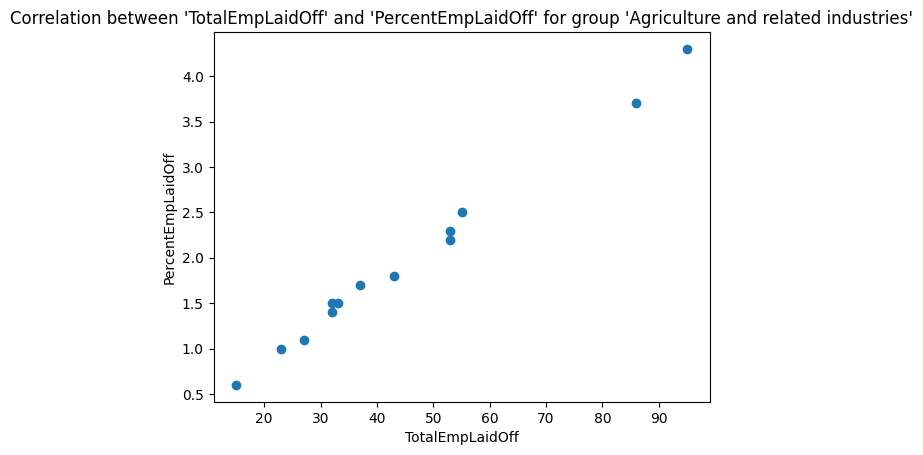

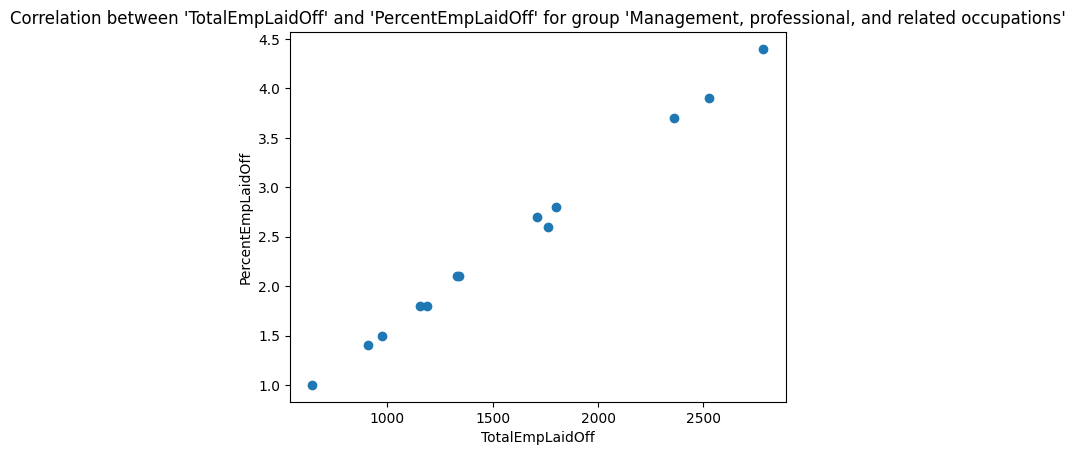

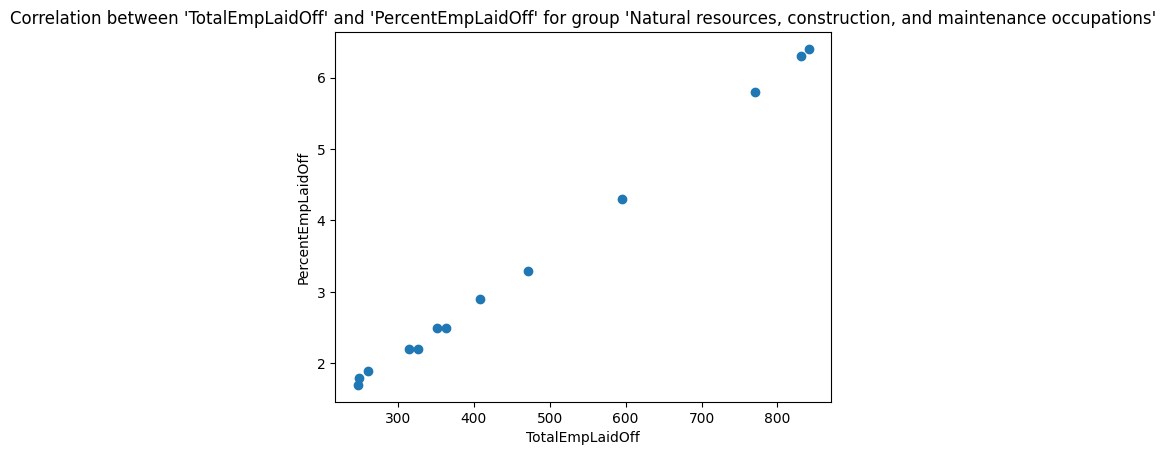

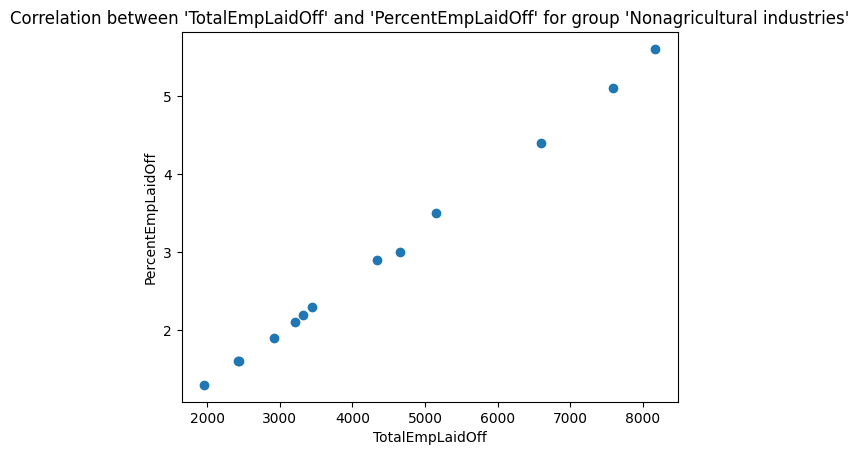

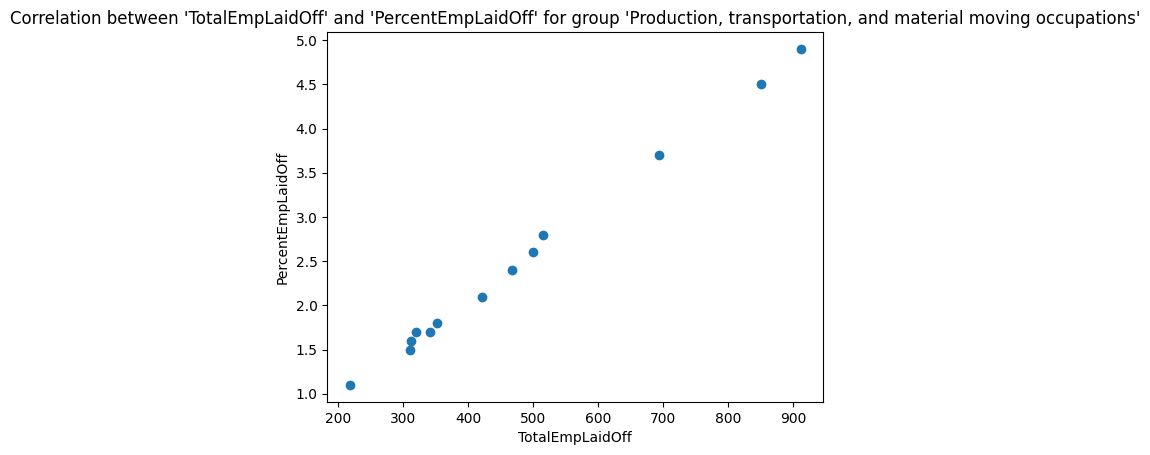

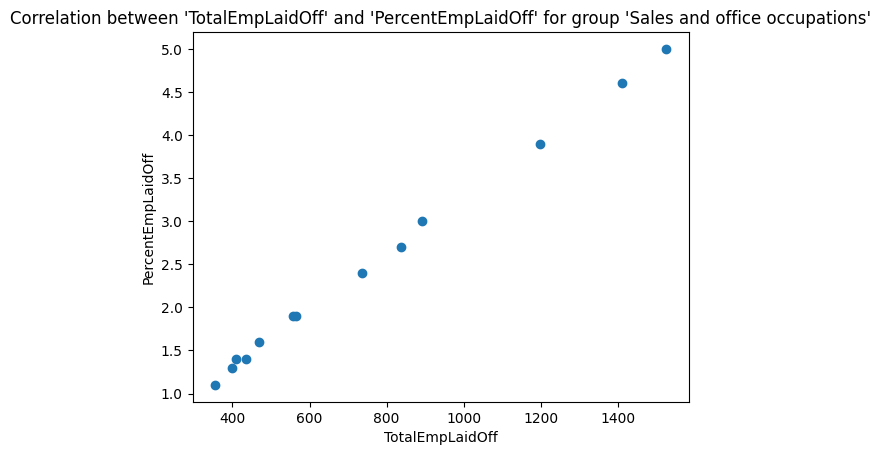

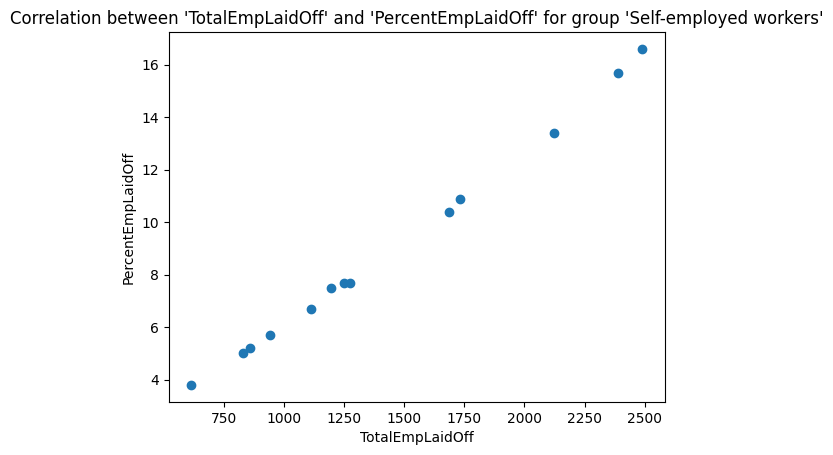

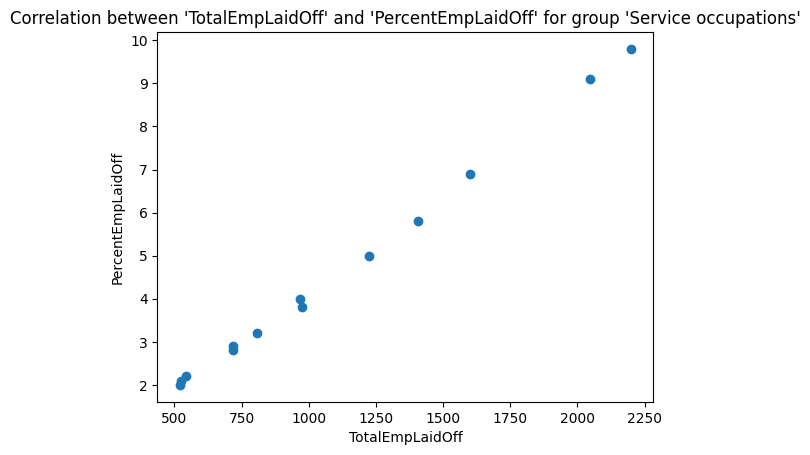

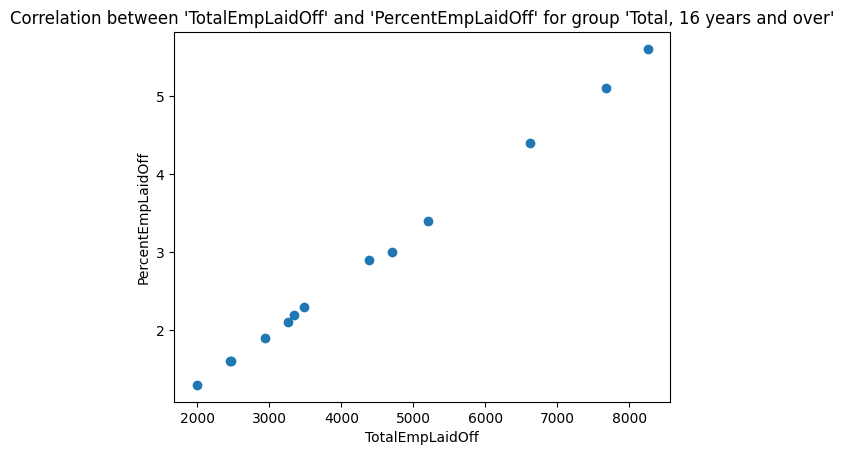

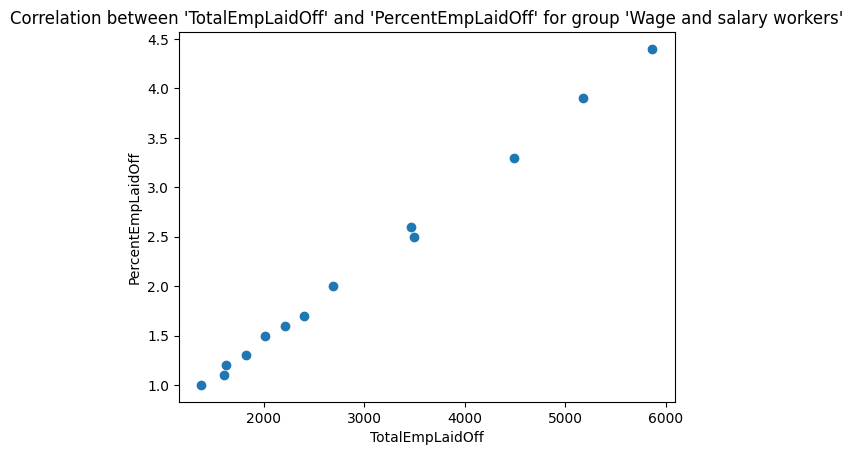

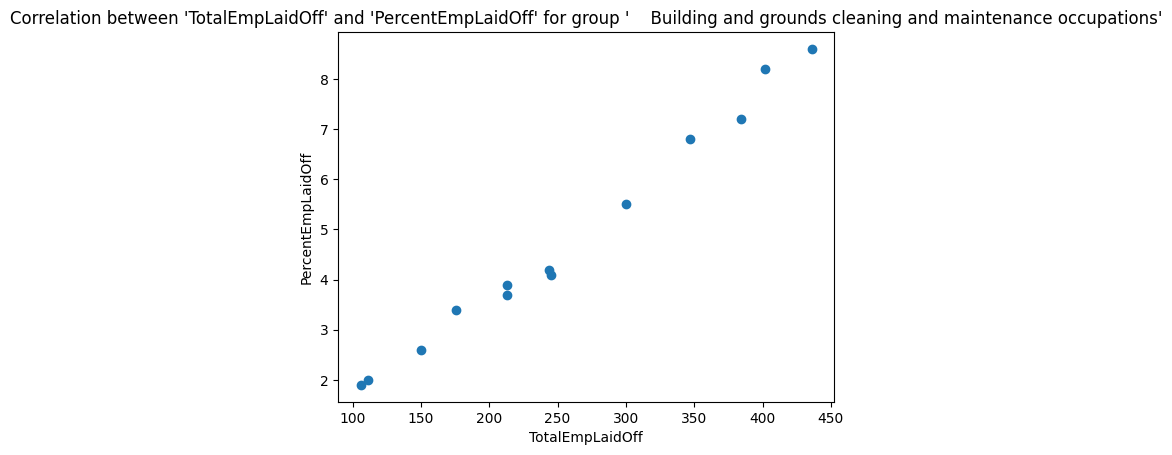

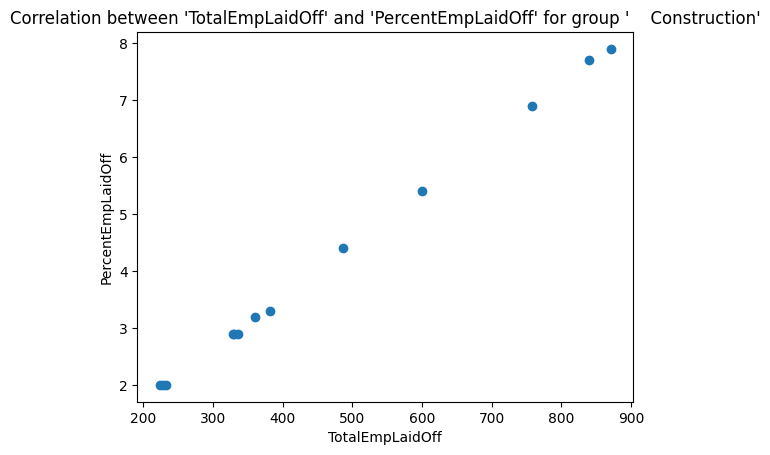

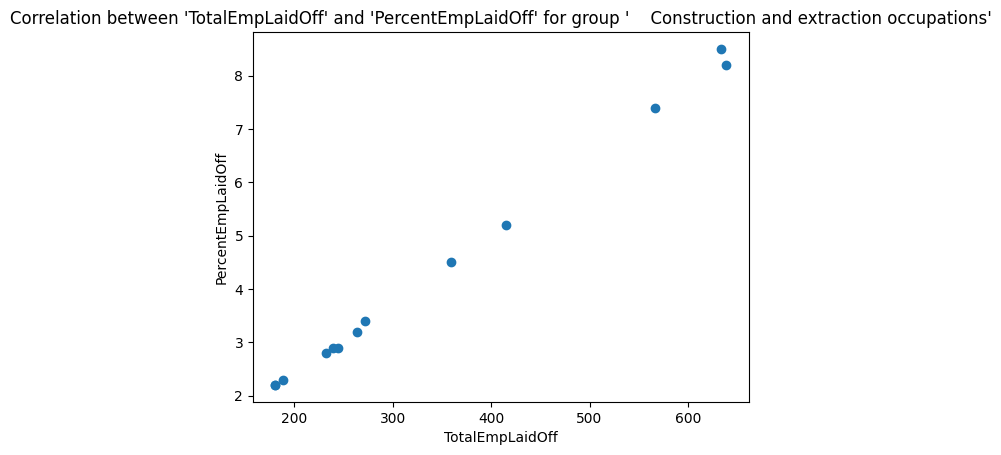

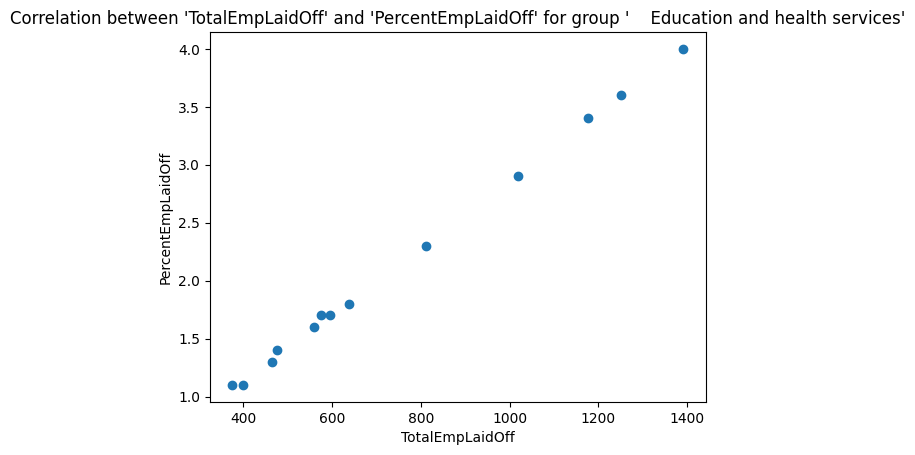

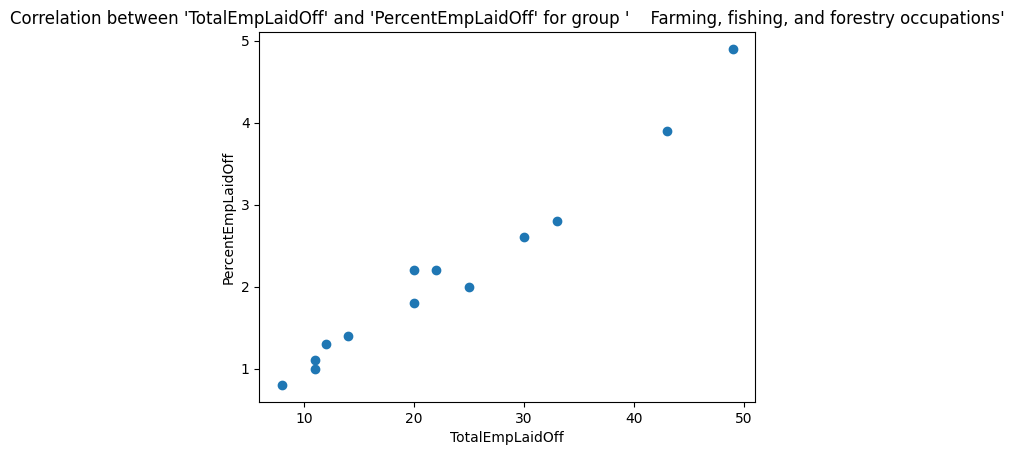

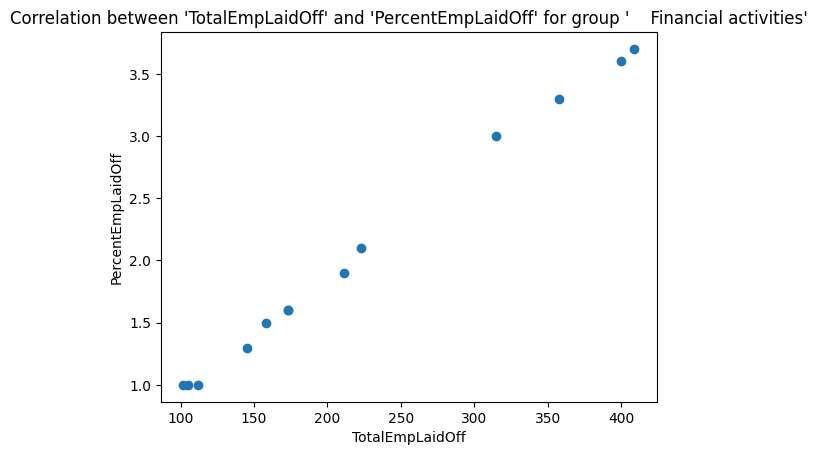

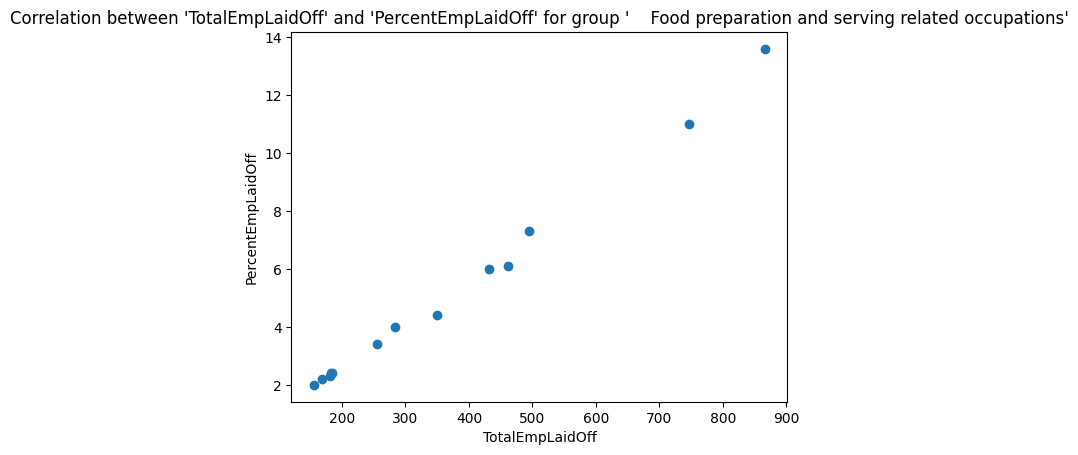

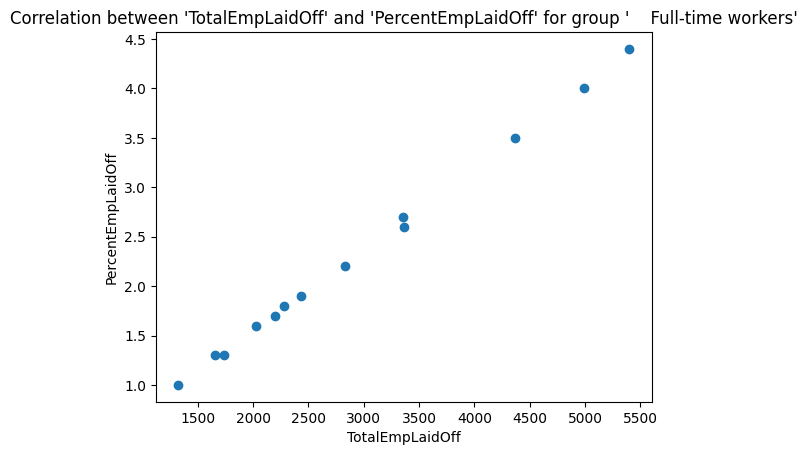

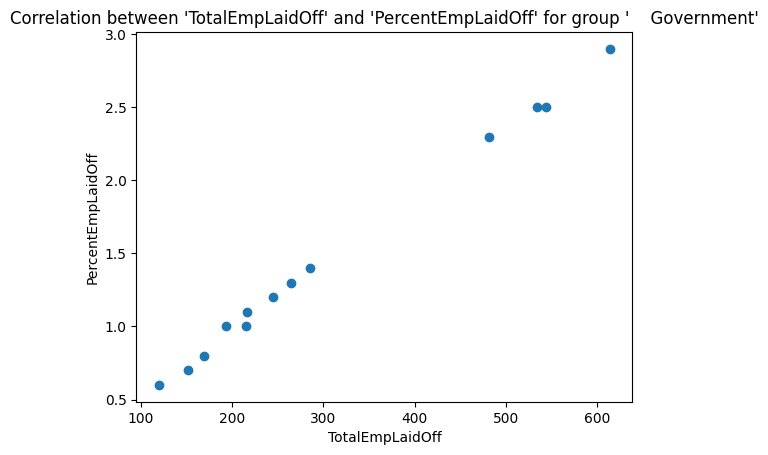

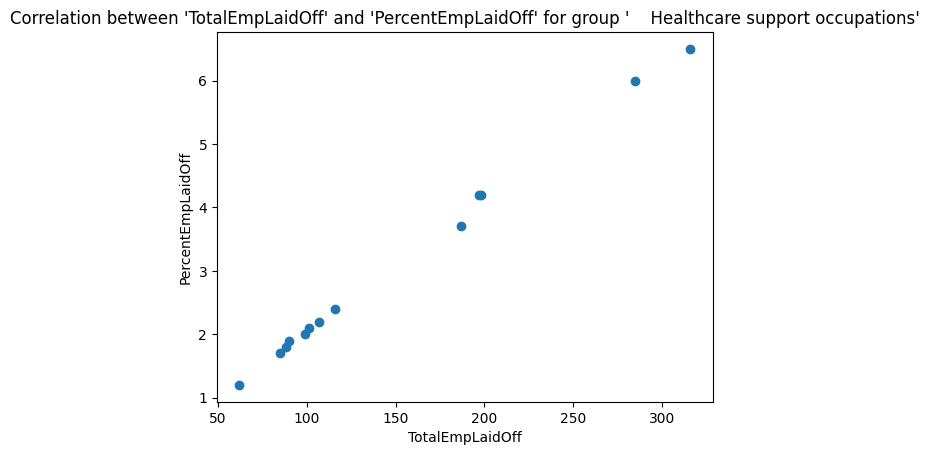

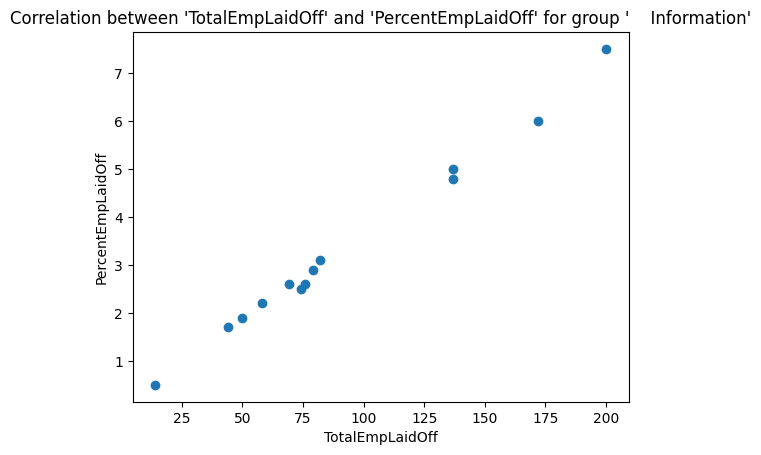

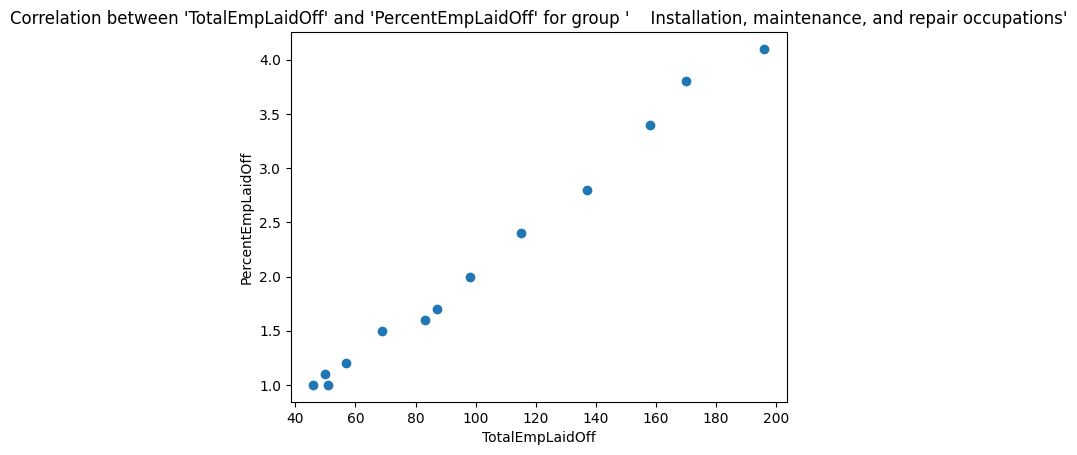

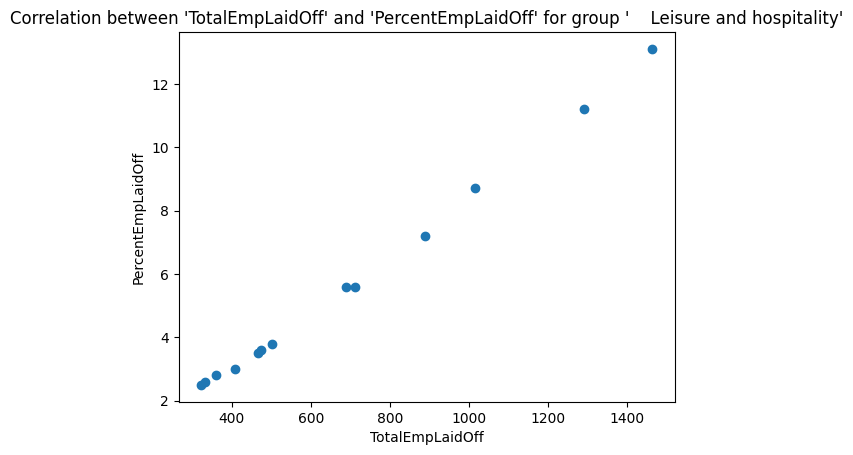

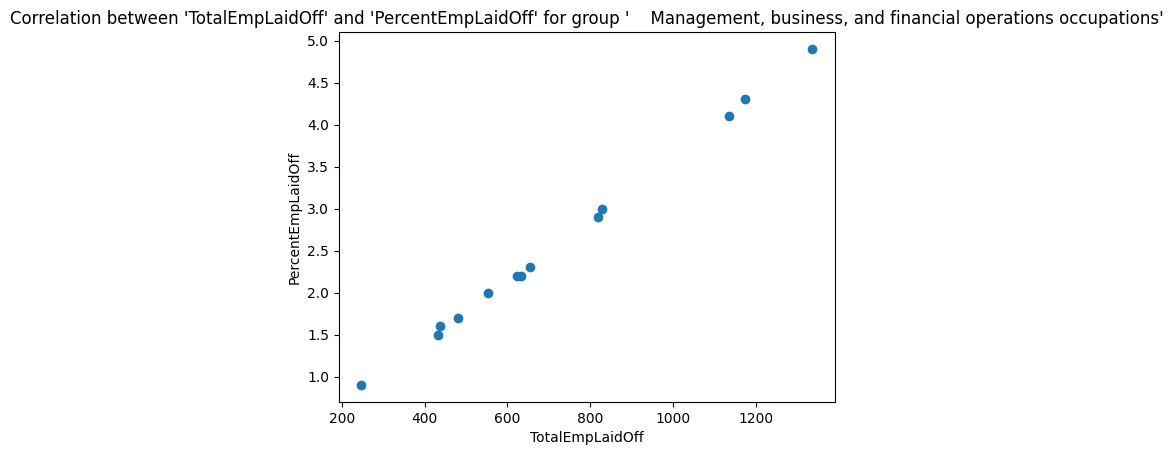

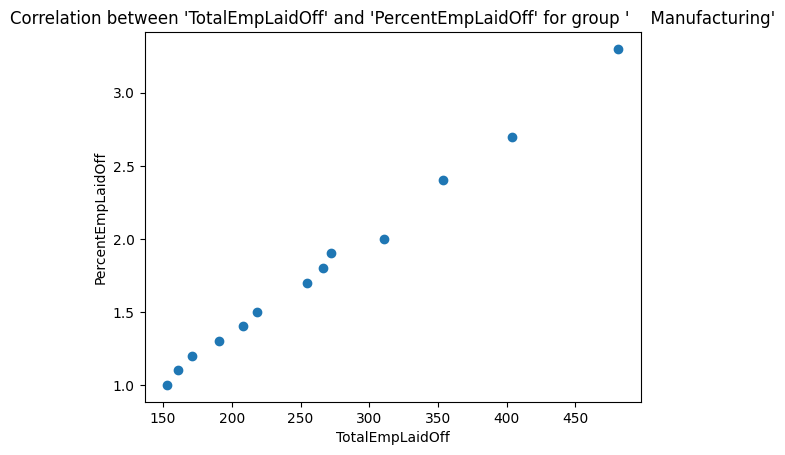

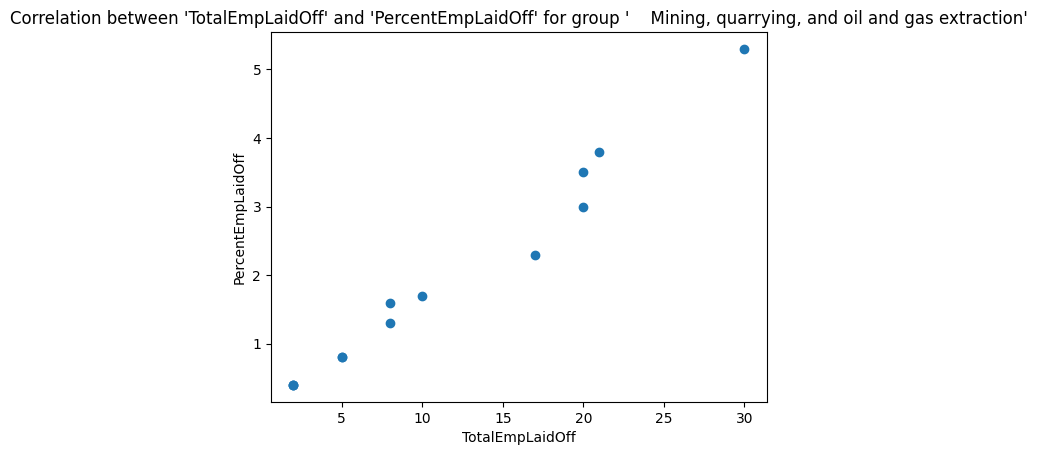

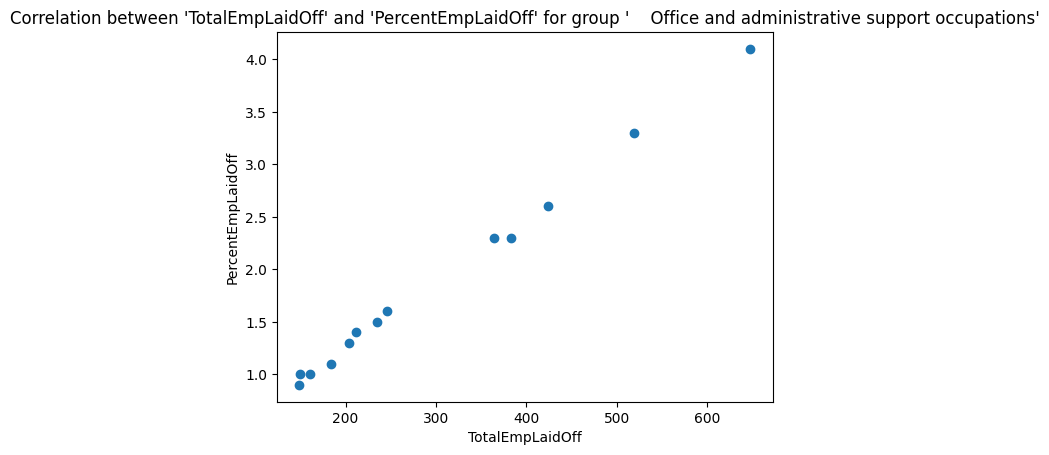

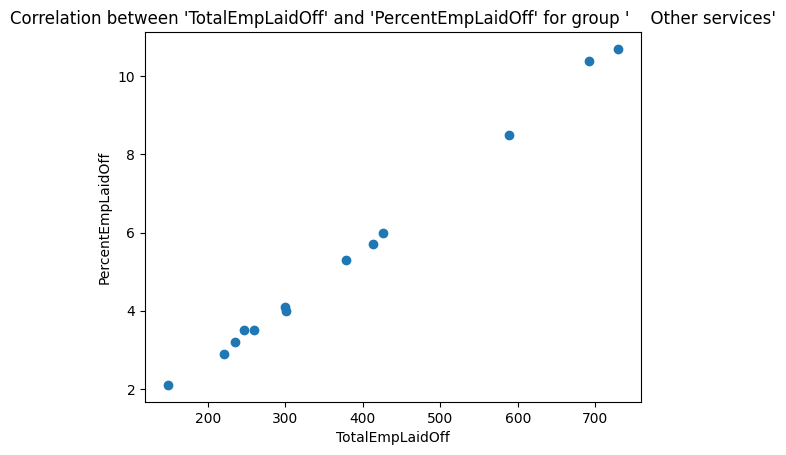

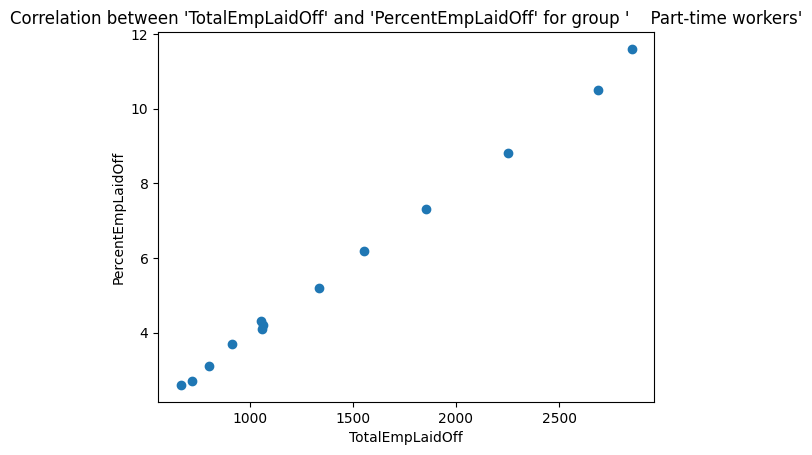

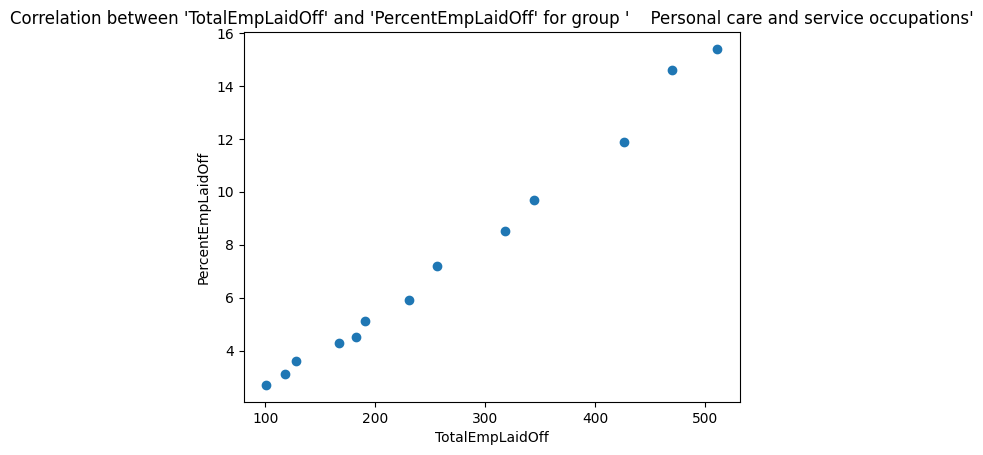

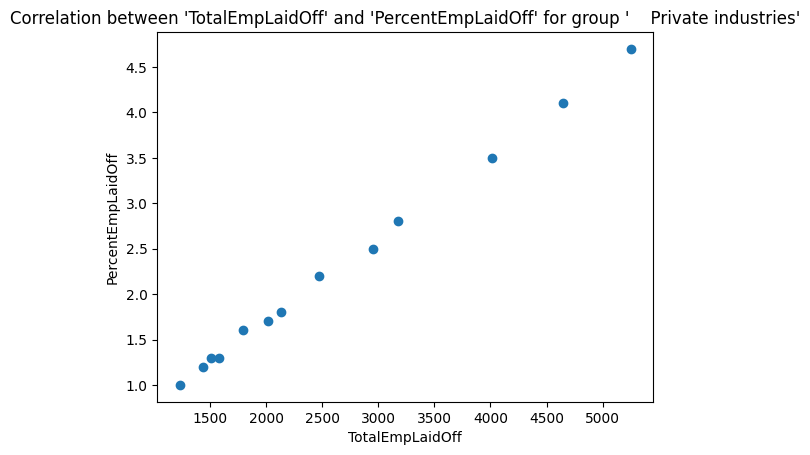

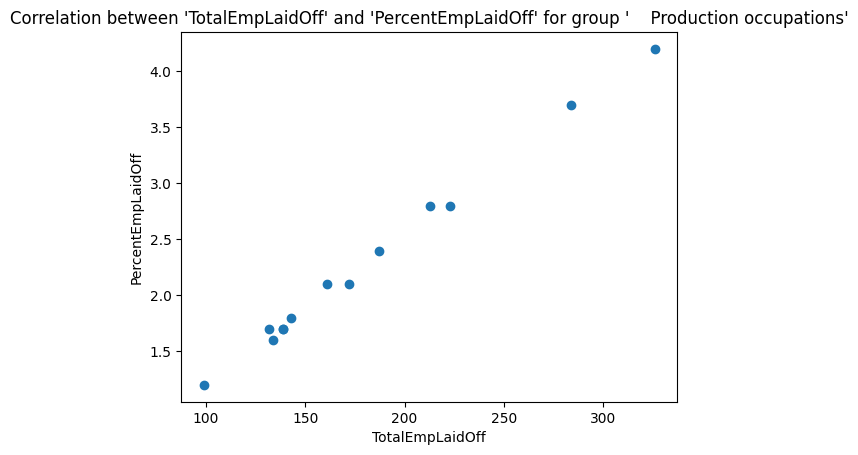

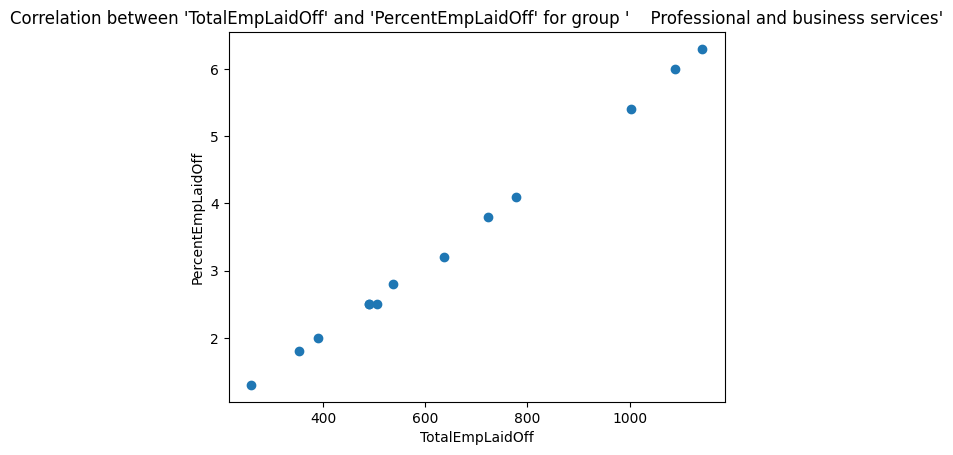

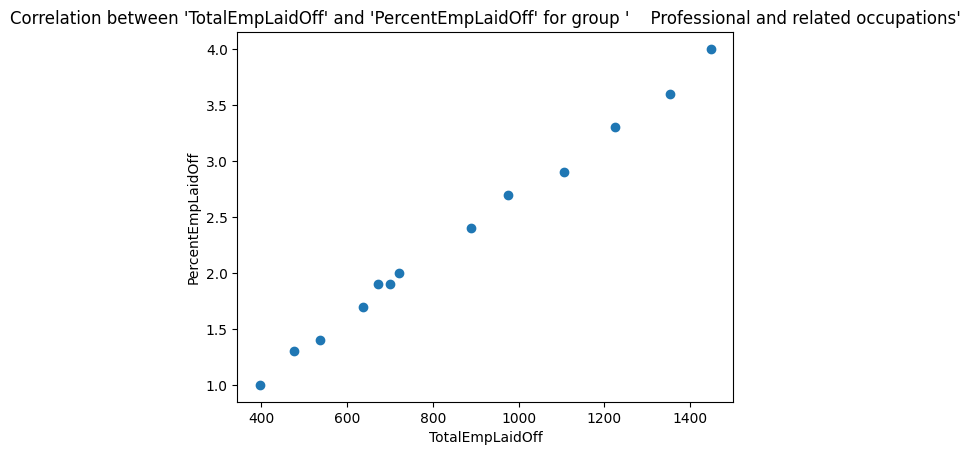

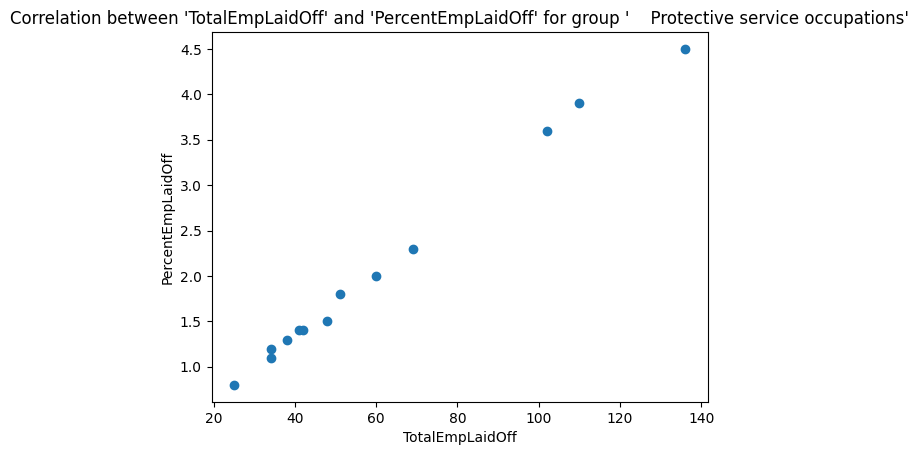

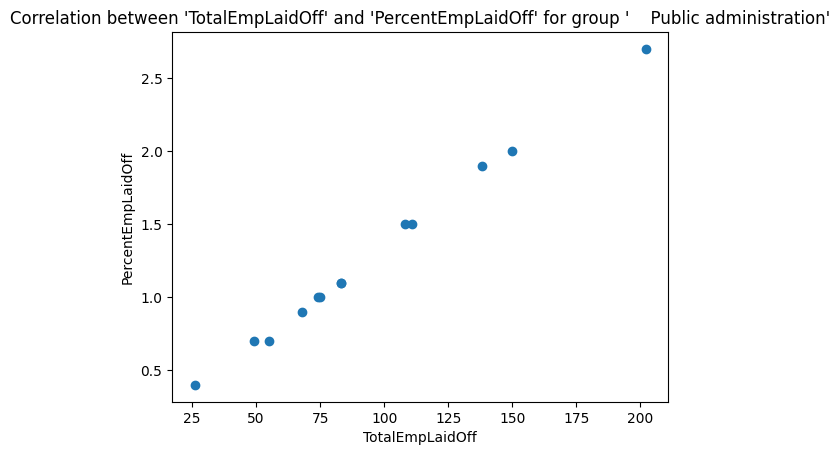

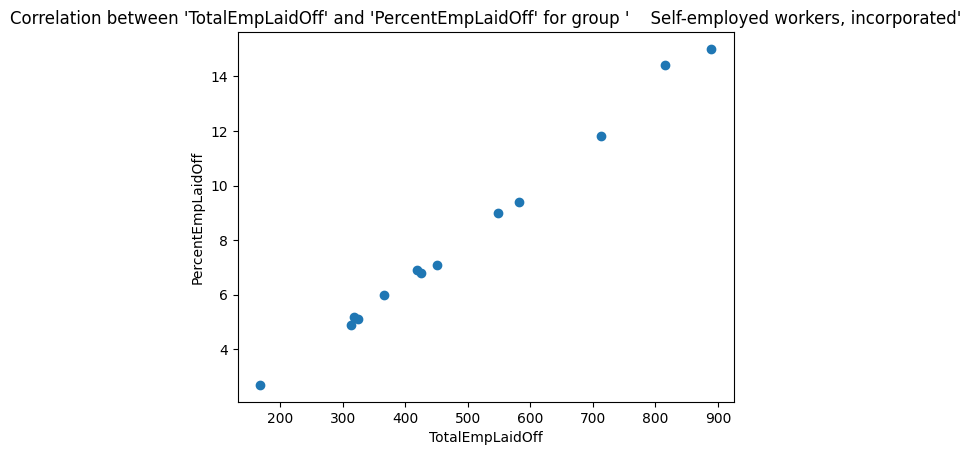

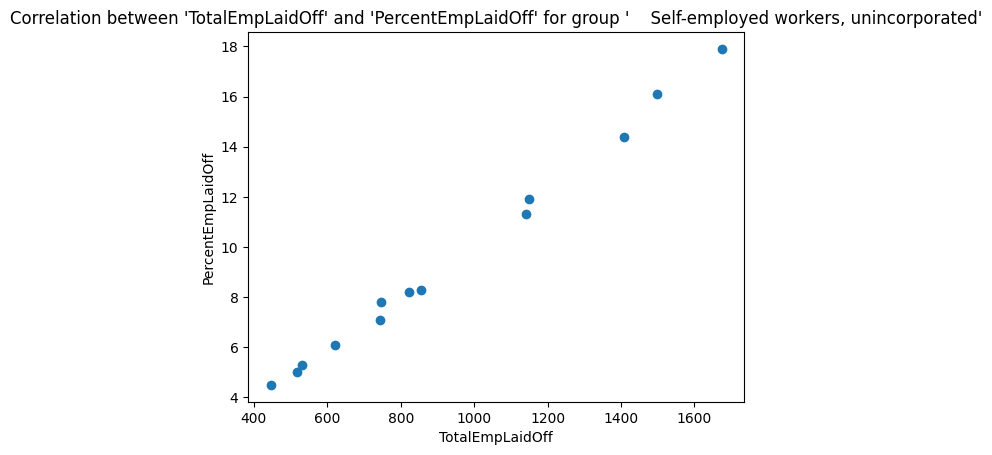

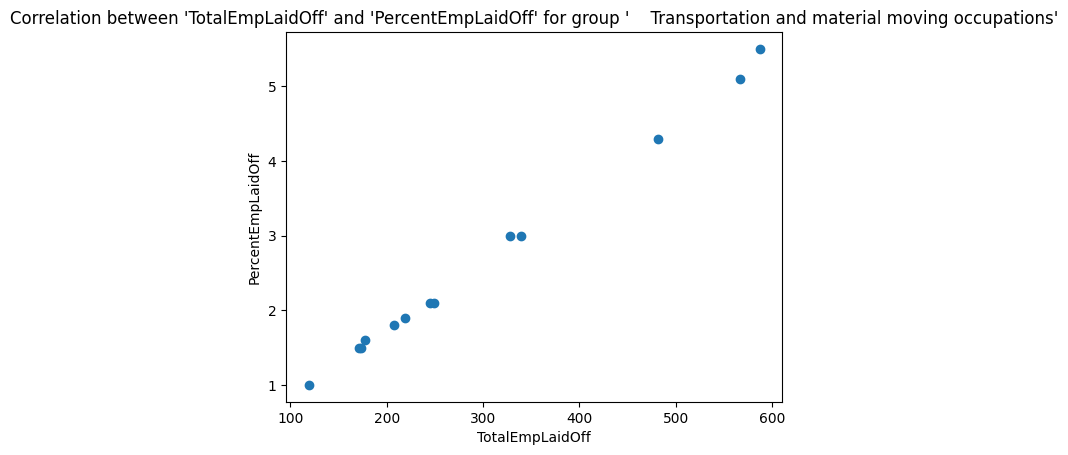

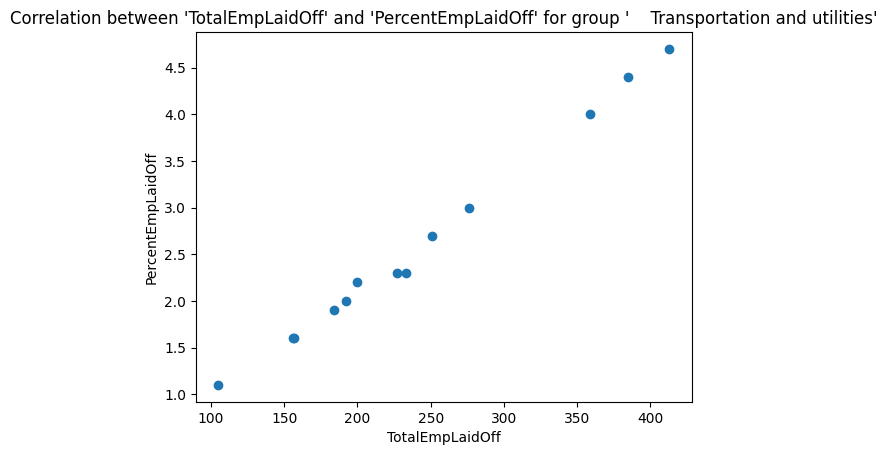

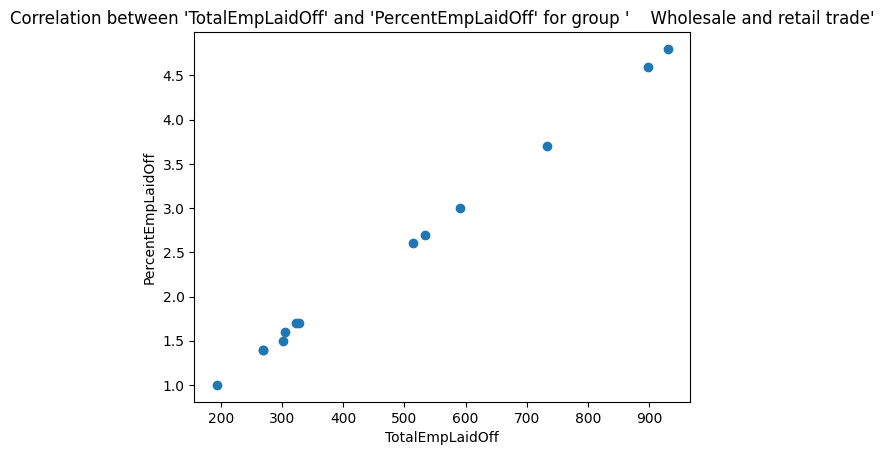

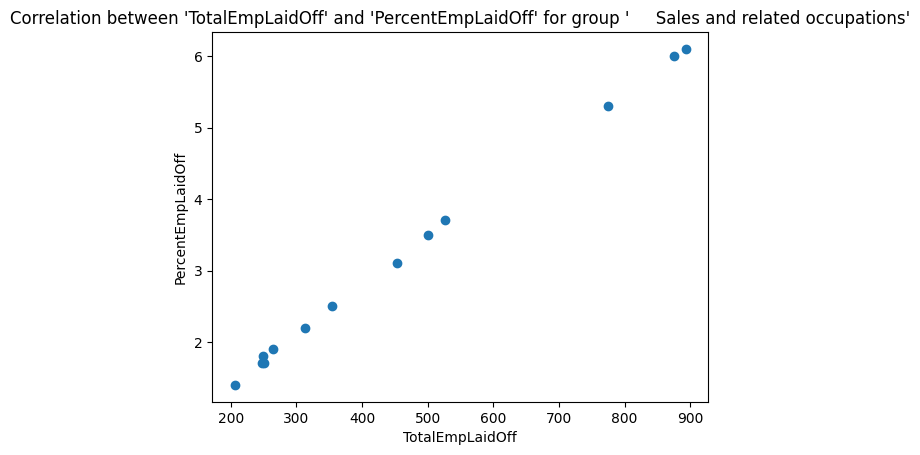

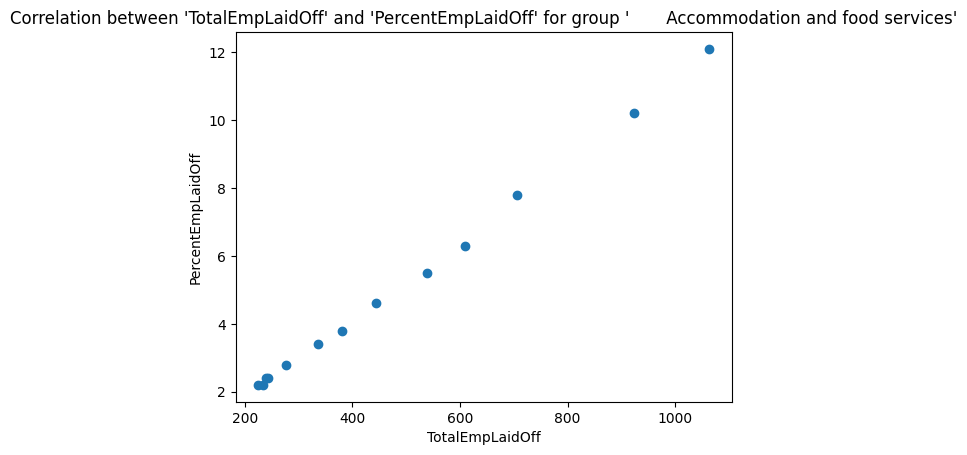

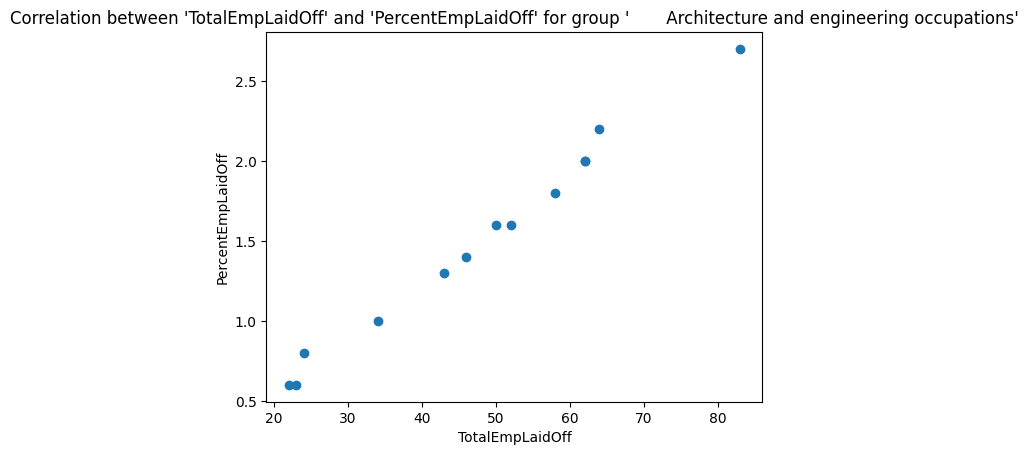

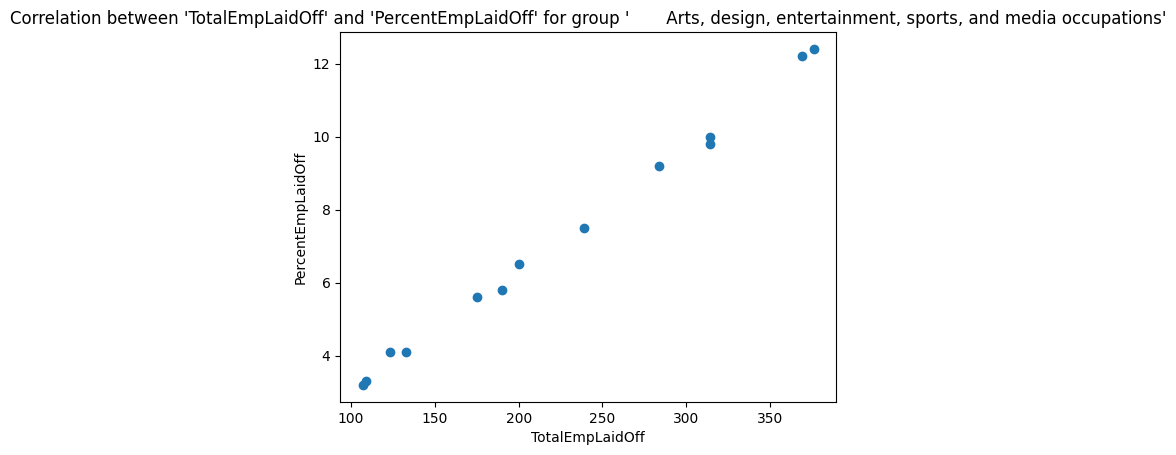

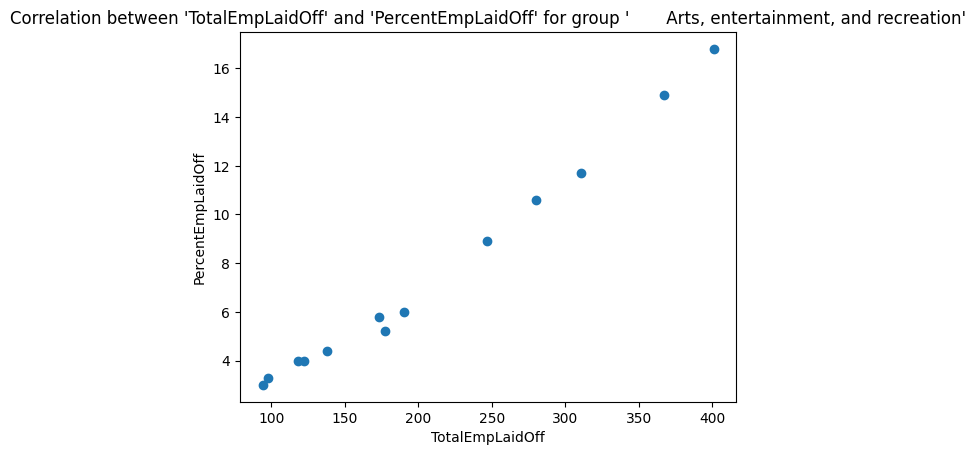

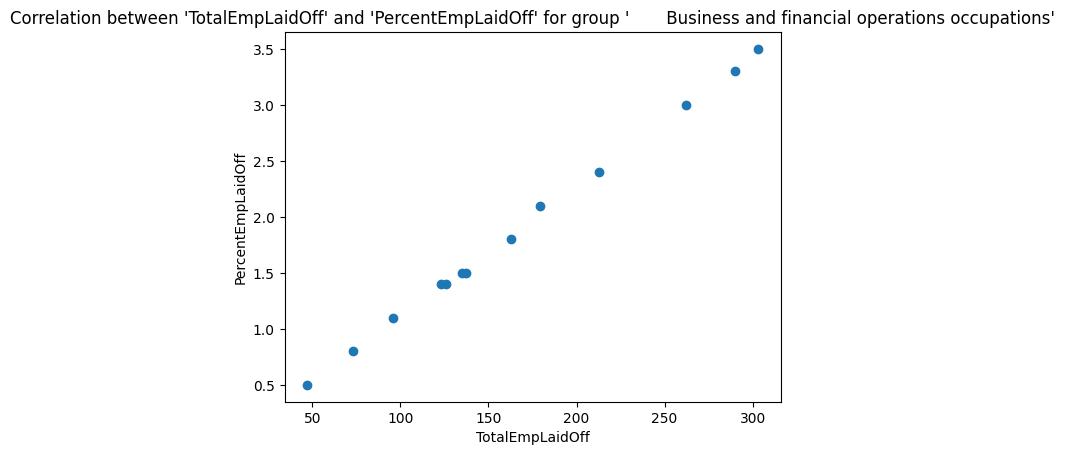

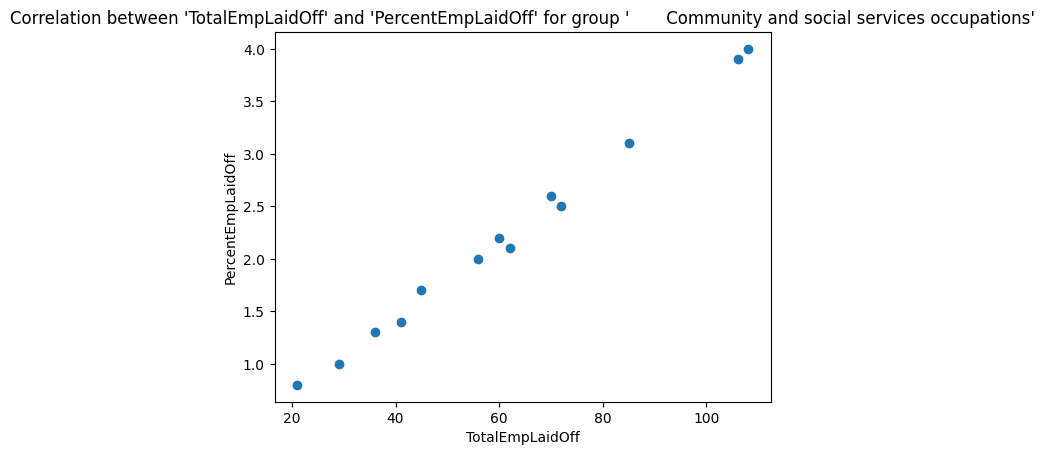

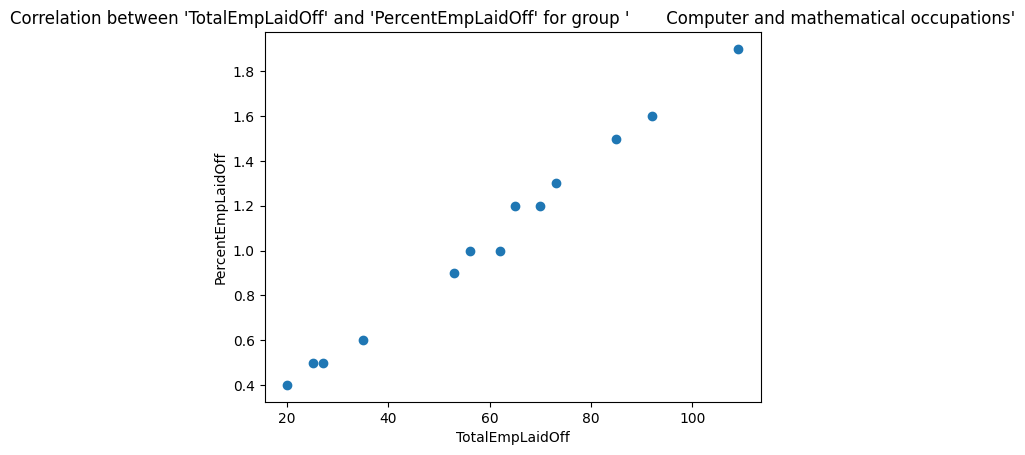

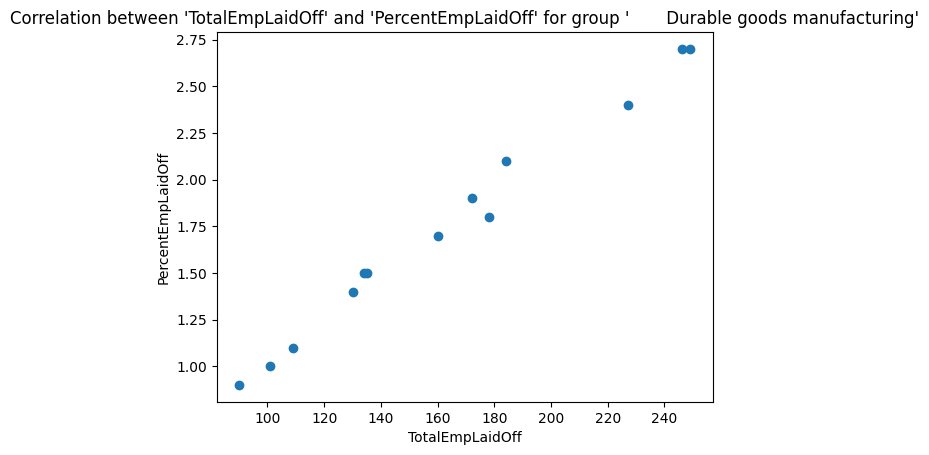

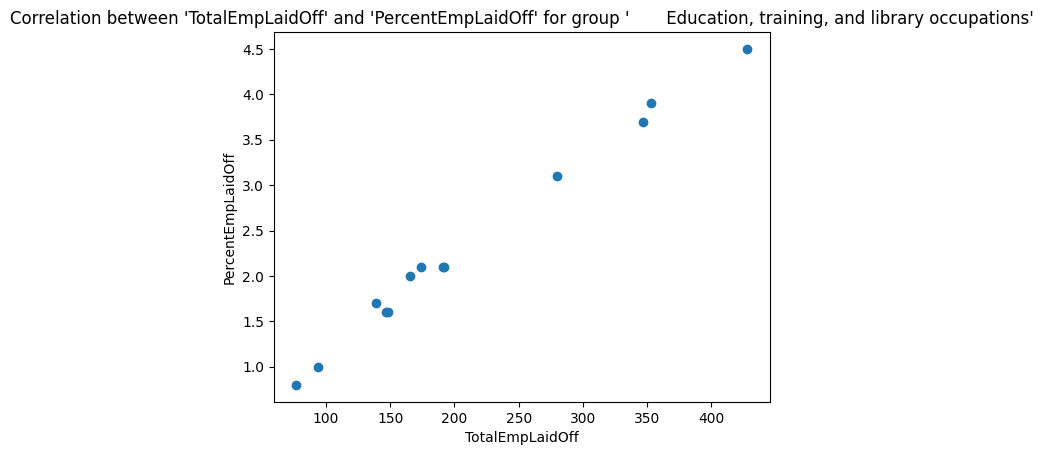

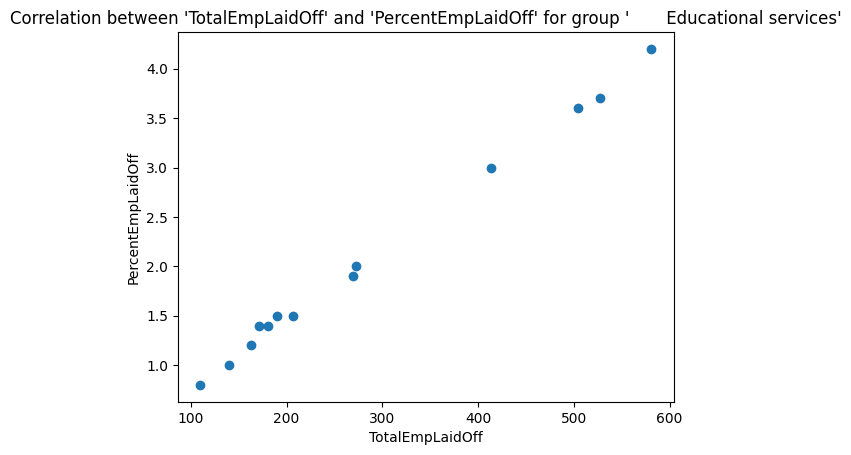

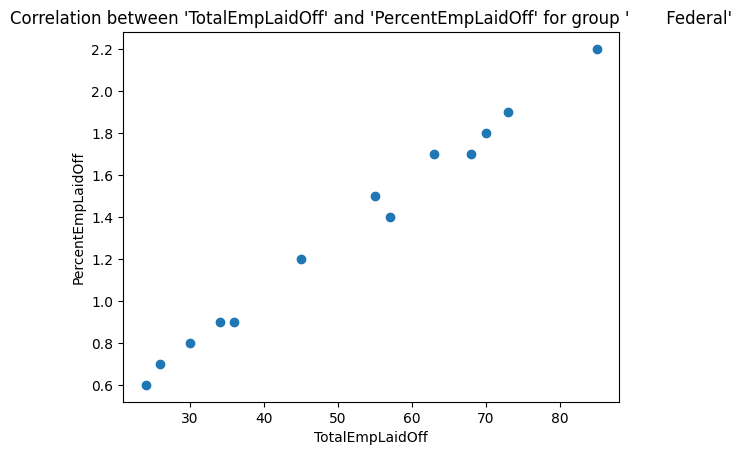

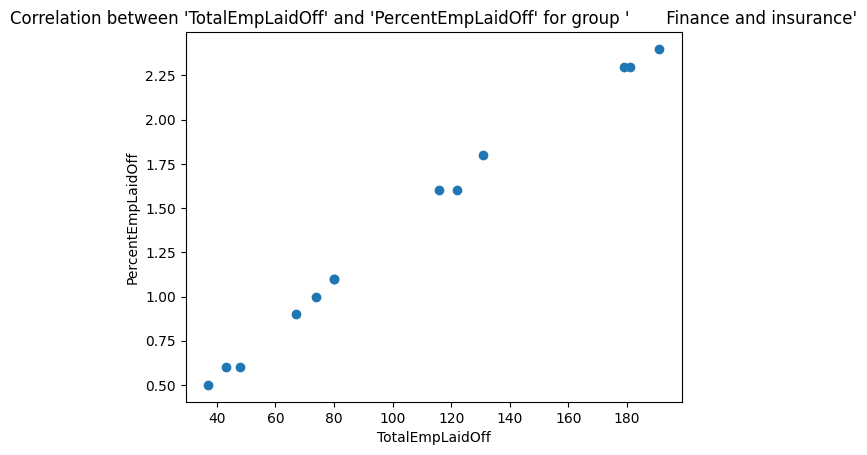

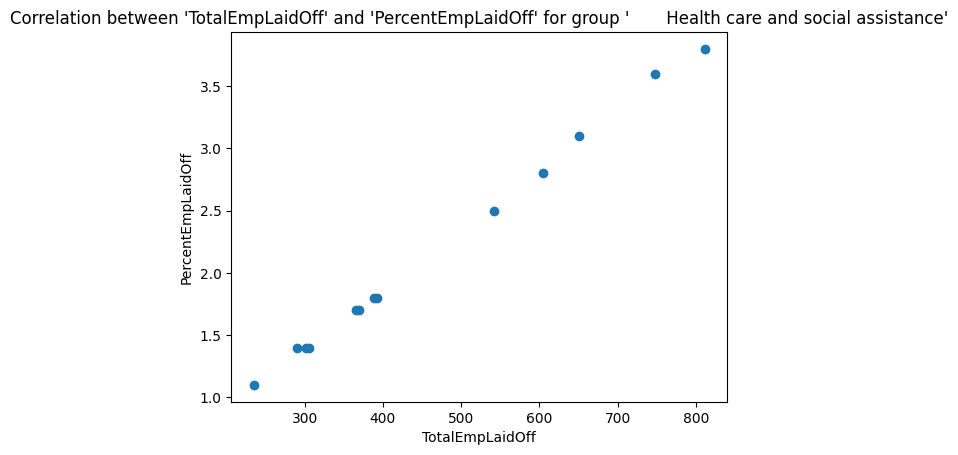

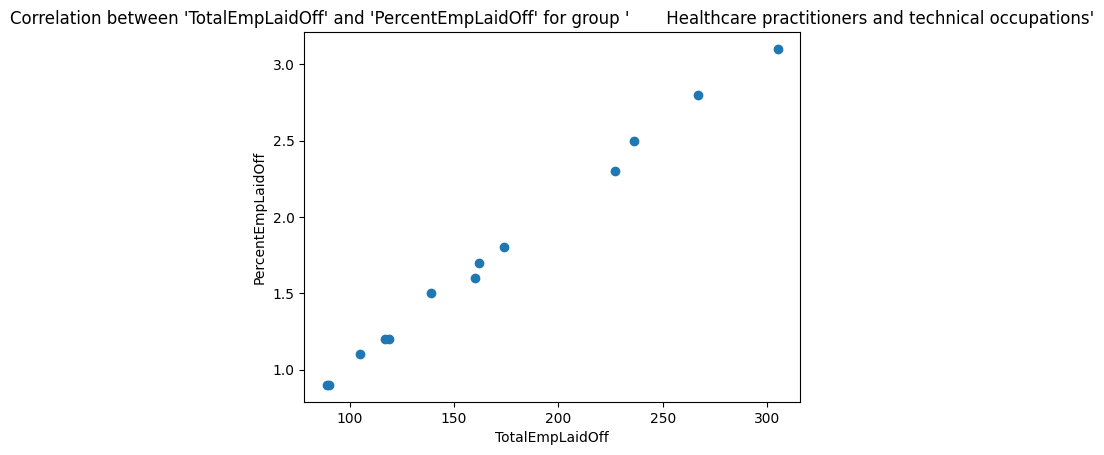

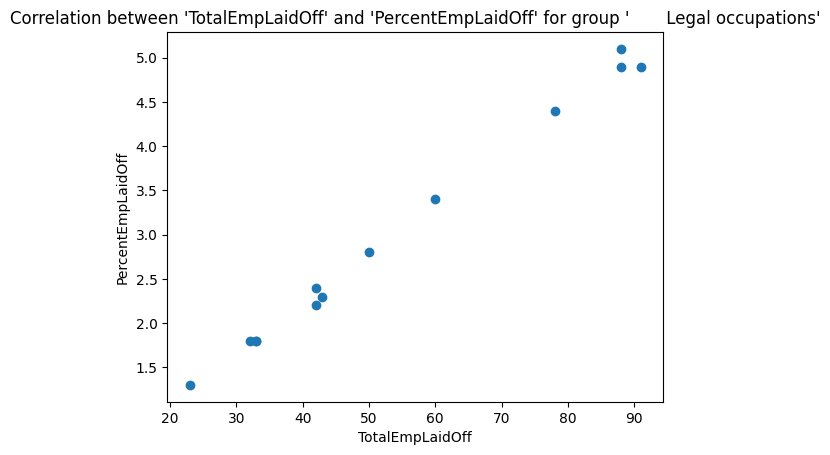

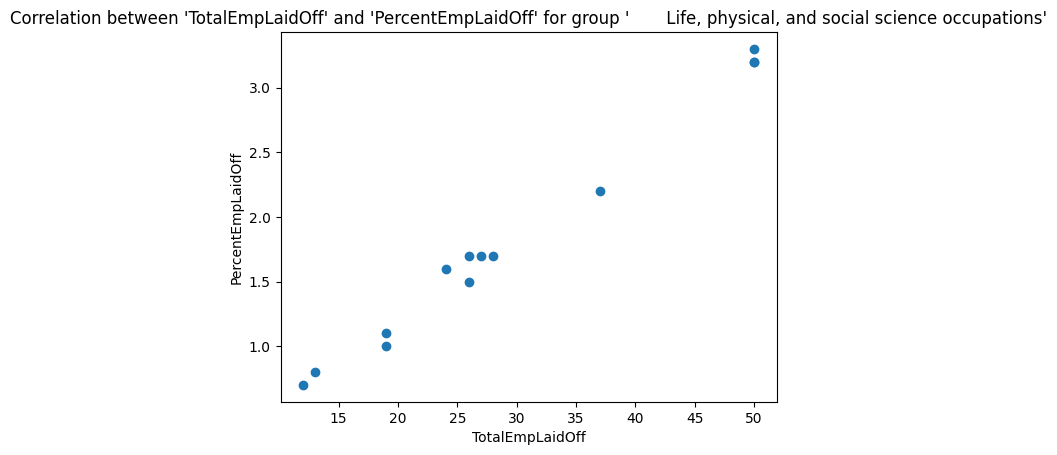

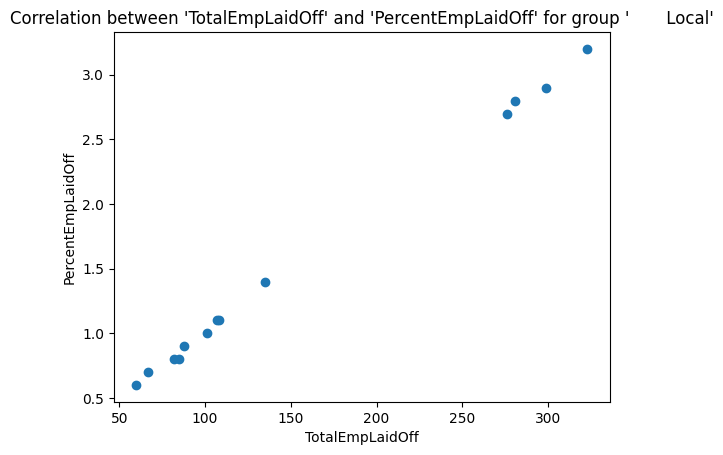

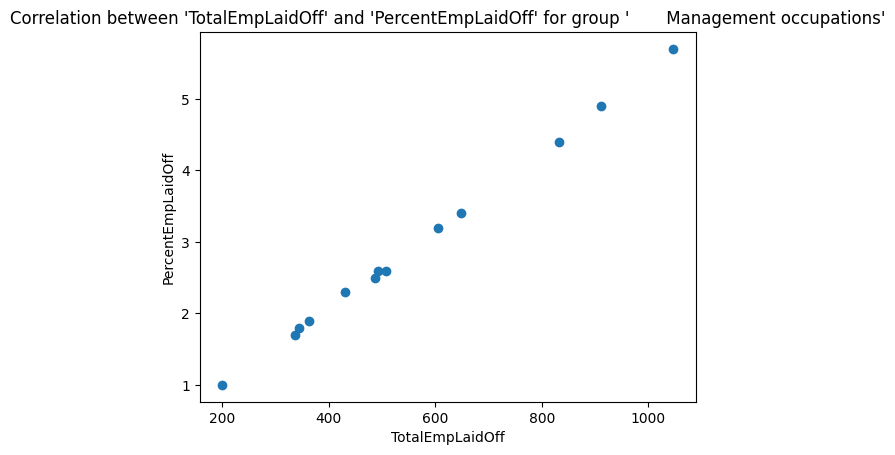

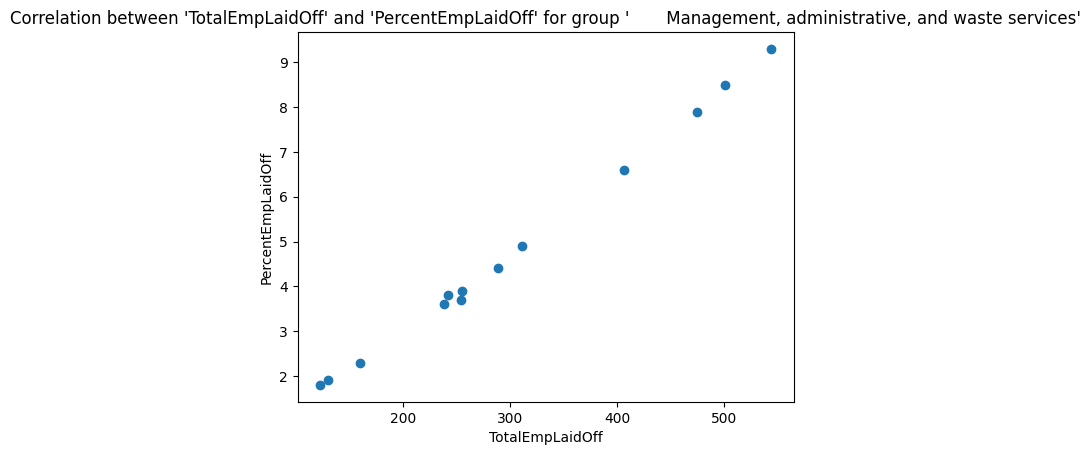

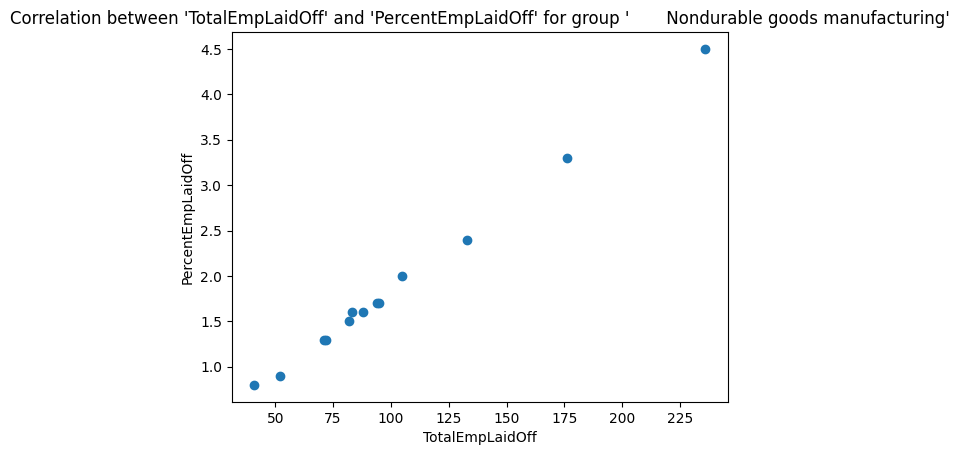

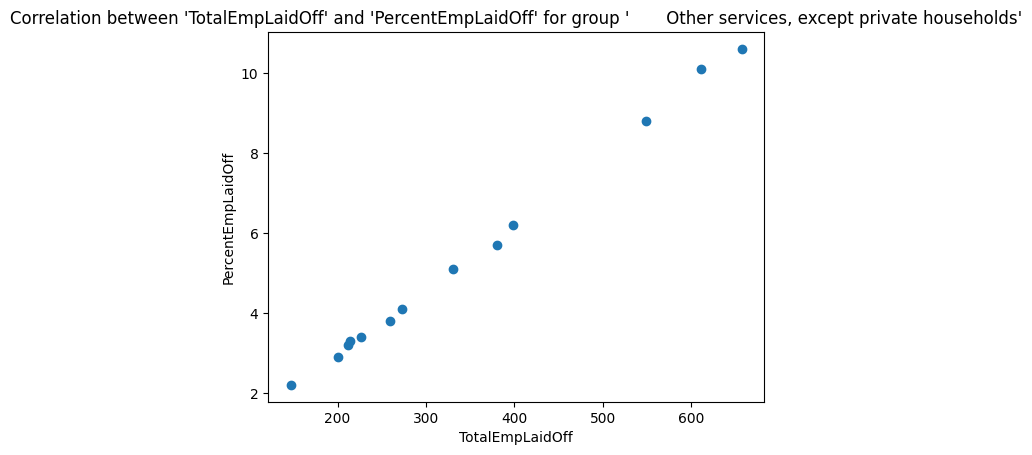

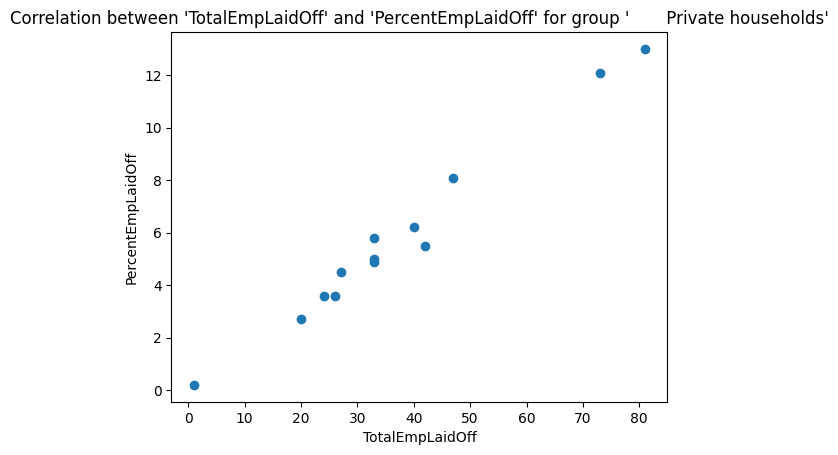

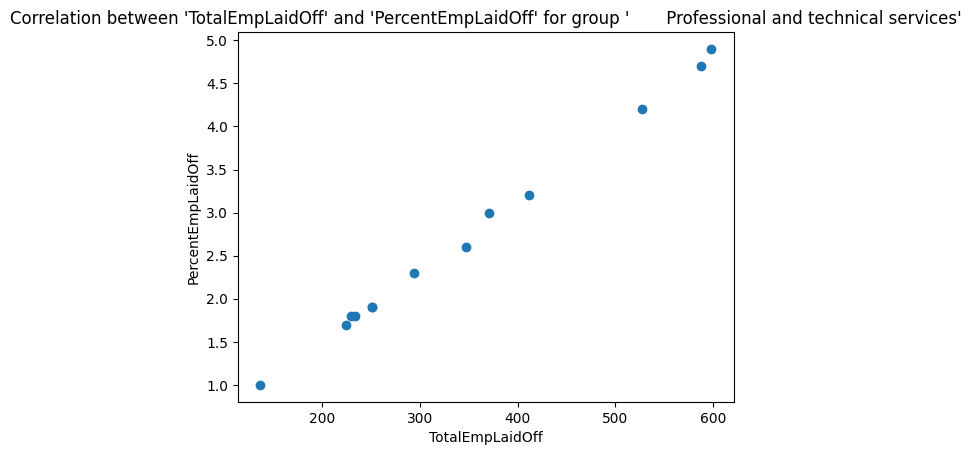

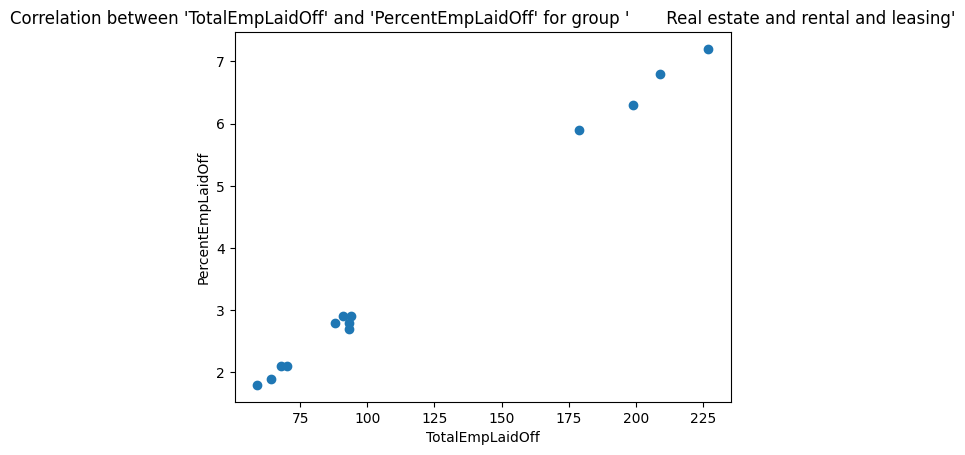

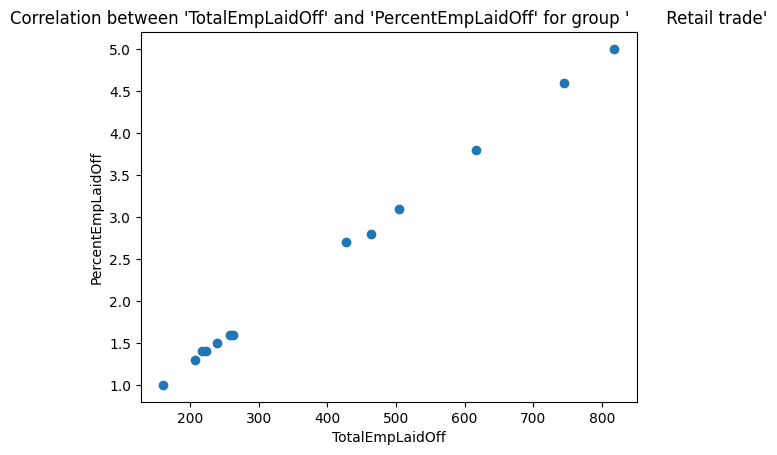

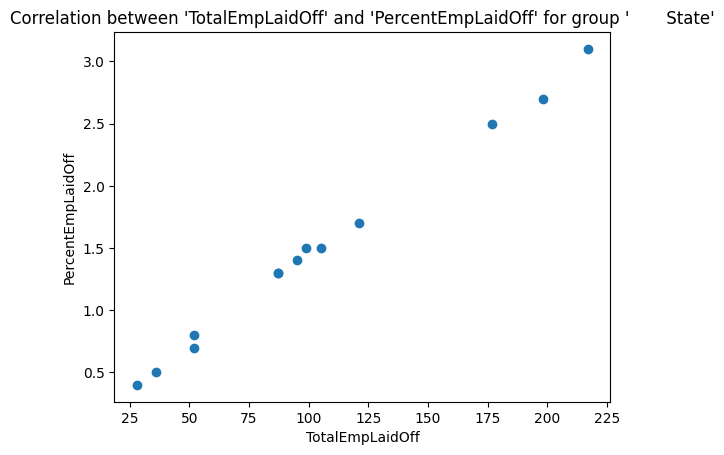

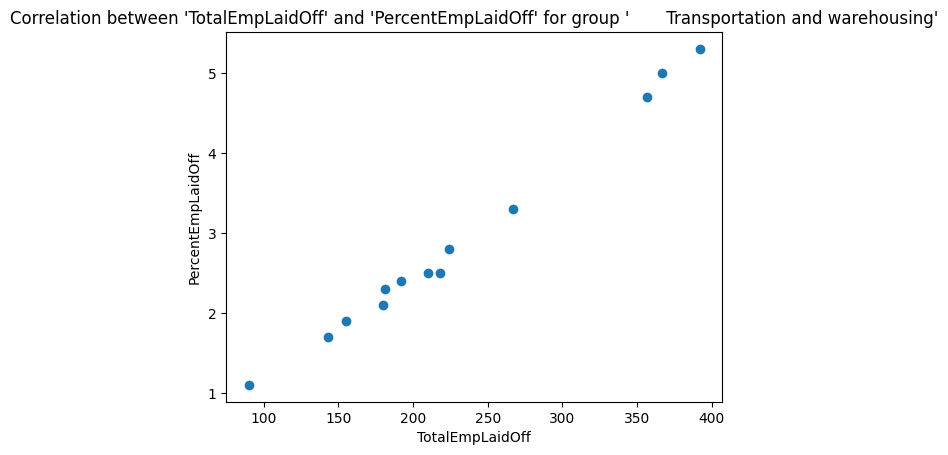

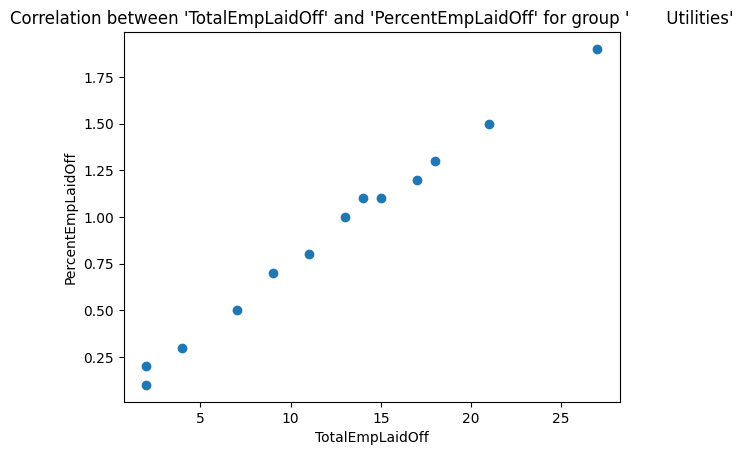

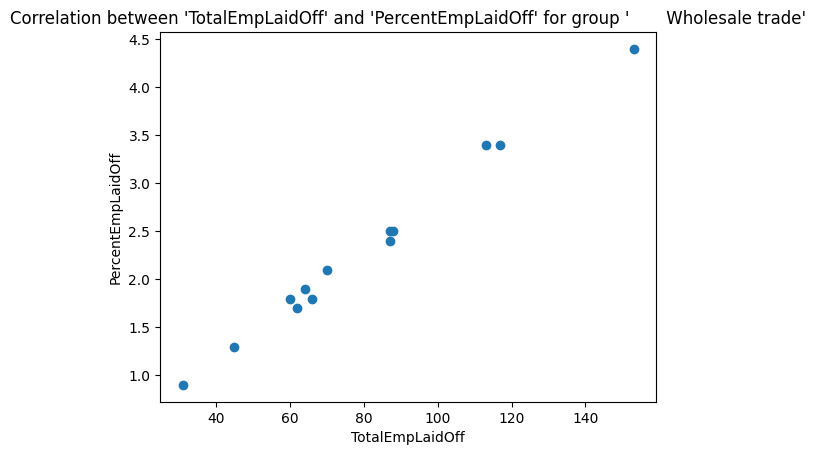

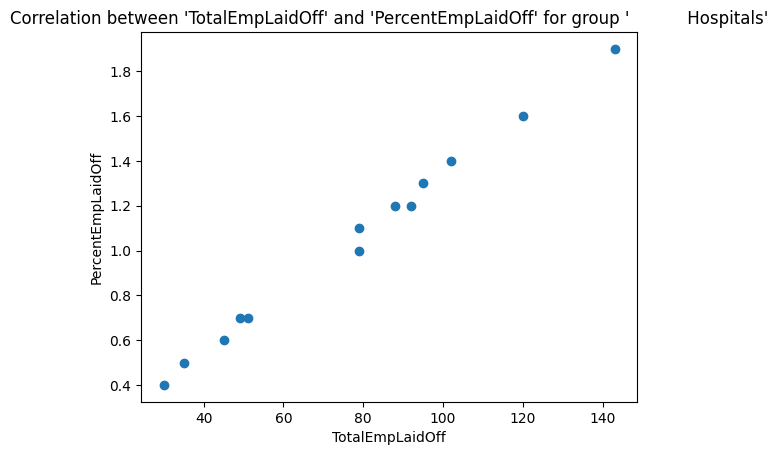

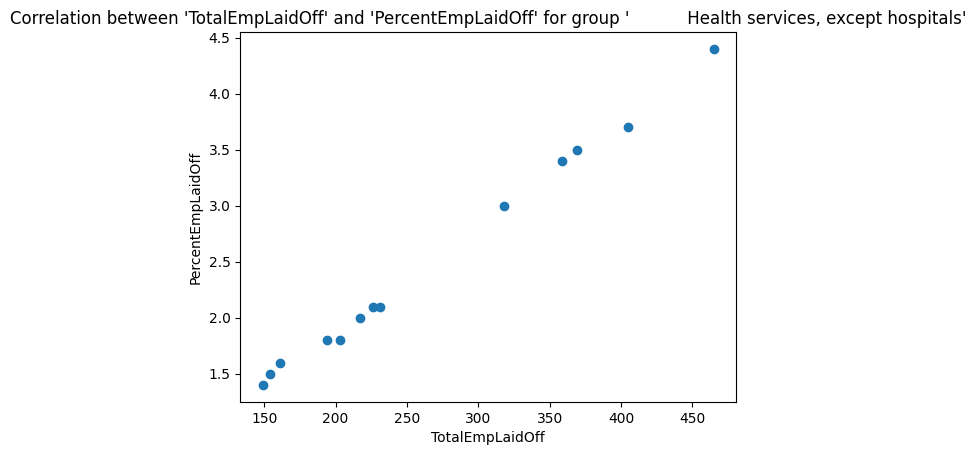

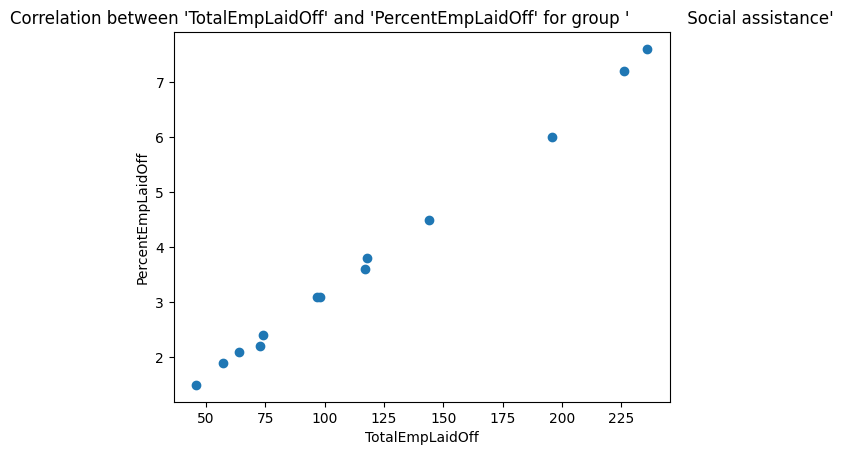

In [14]:
for name, group in grouped:
    # Plot the data points
    plt.scatter(group['TotalEmpLaidOff'], group['PercentEmpLaidOff'])
    # Set the plot title and axis labels
    plt.title(f"Correlation between 'TotalEmpLaidOff' and 'PercentEmpLaidOff' for group '{name}'")
    plt.xlabel('TotalEmpLaidOff')
    plt.ylabel('PercentEmpLaidOff')
    # Display the plot
    plt.show()

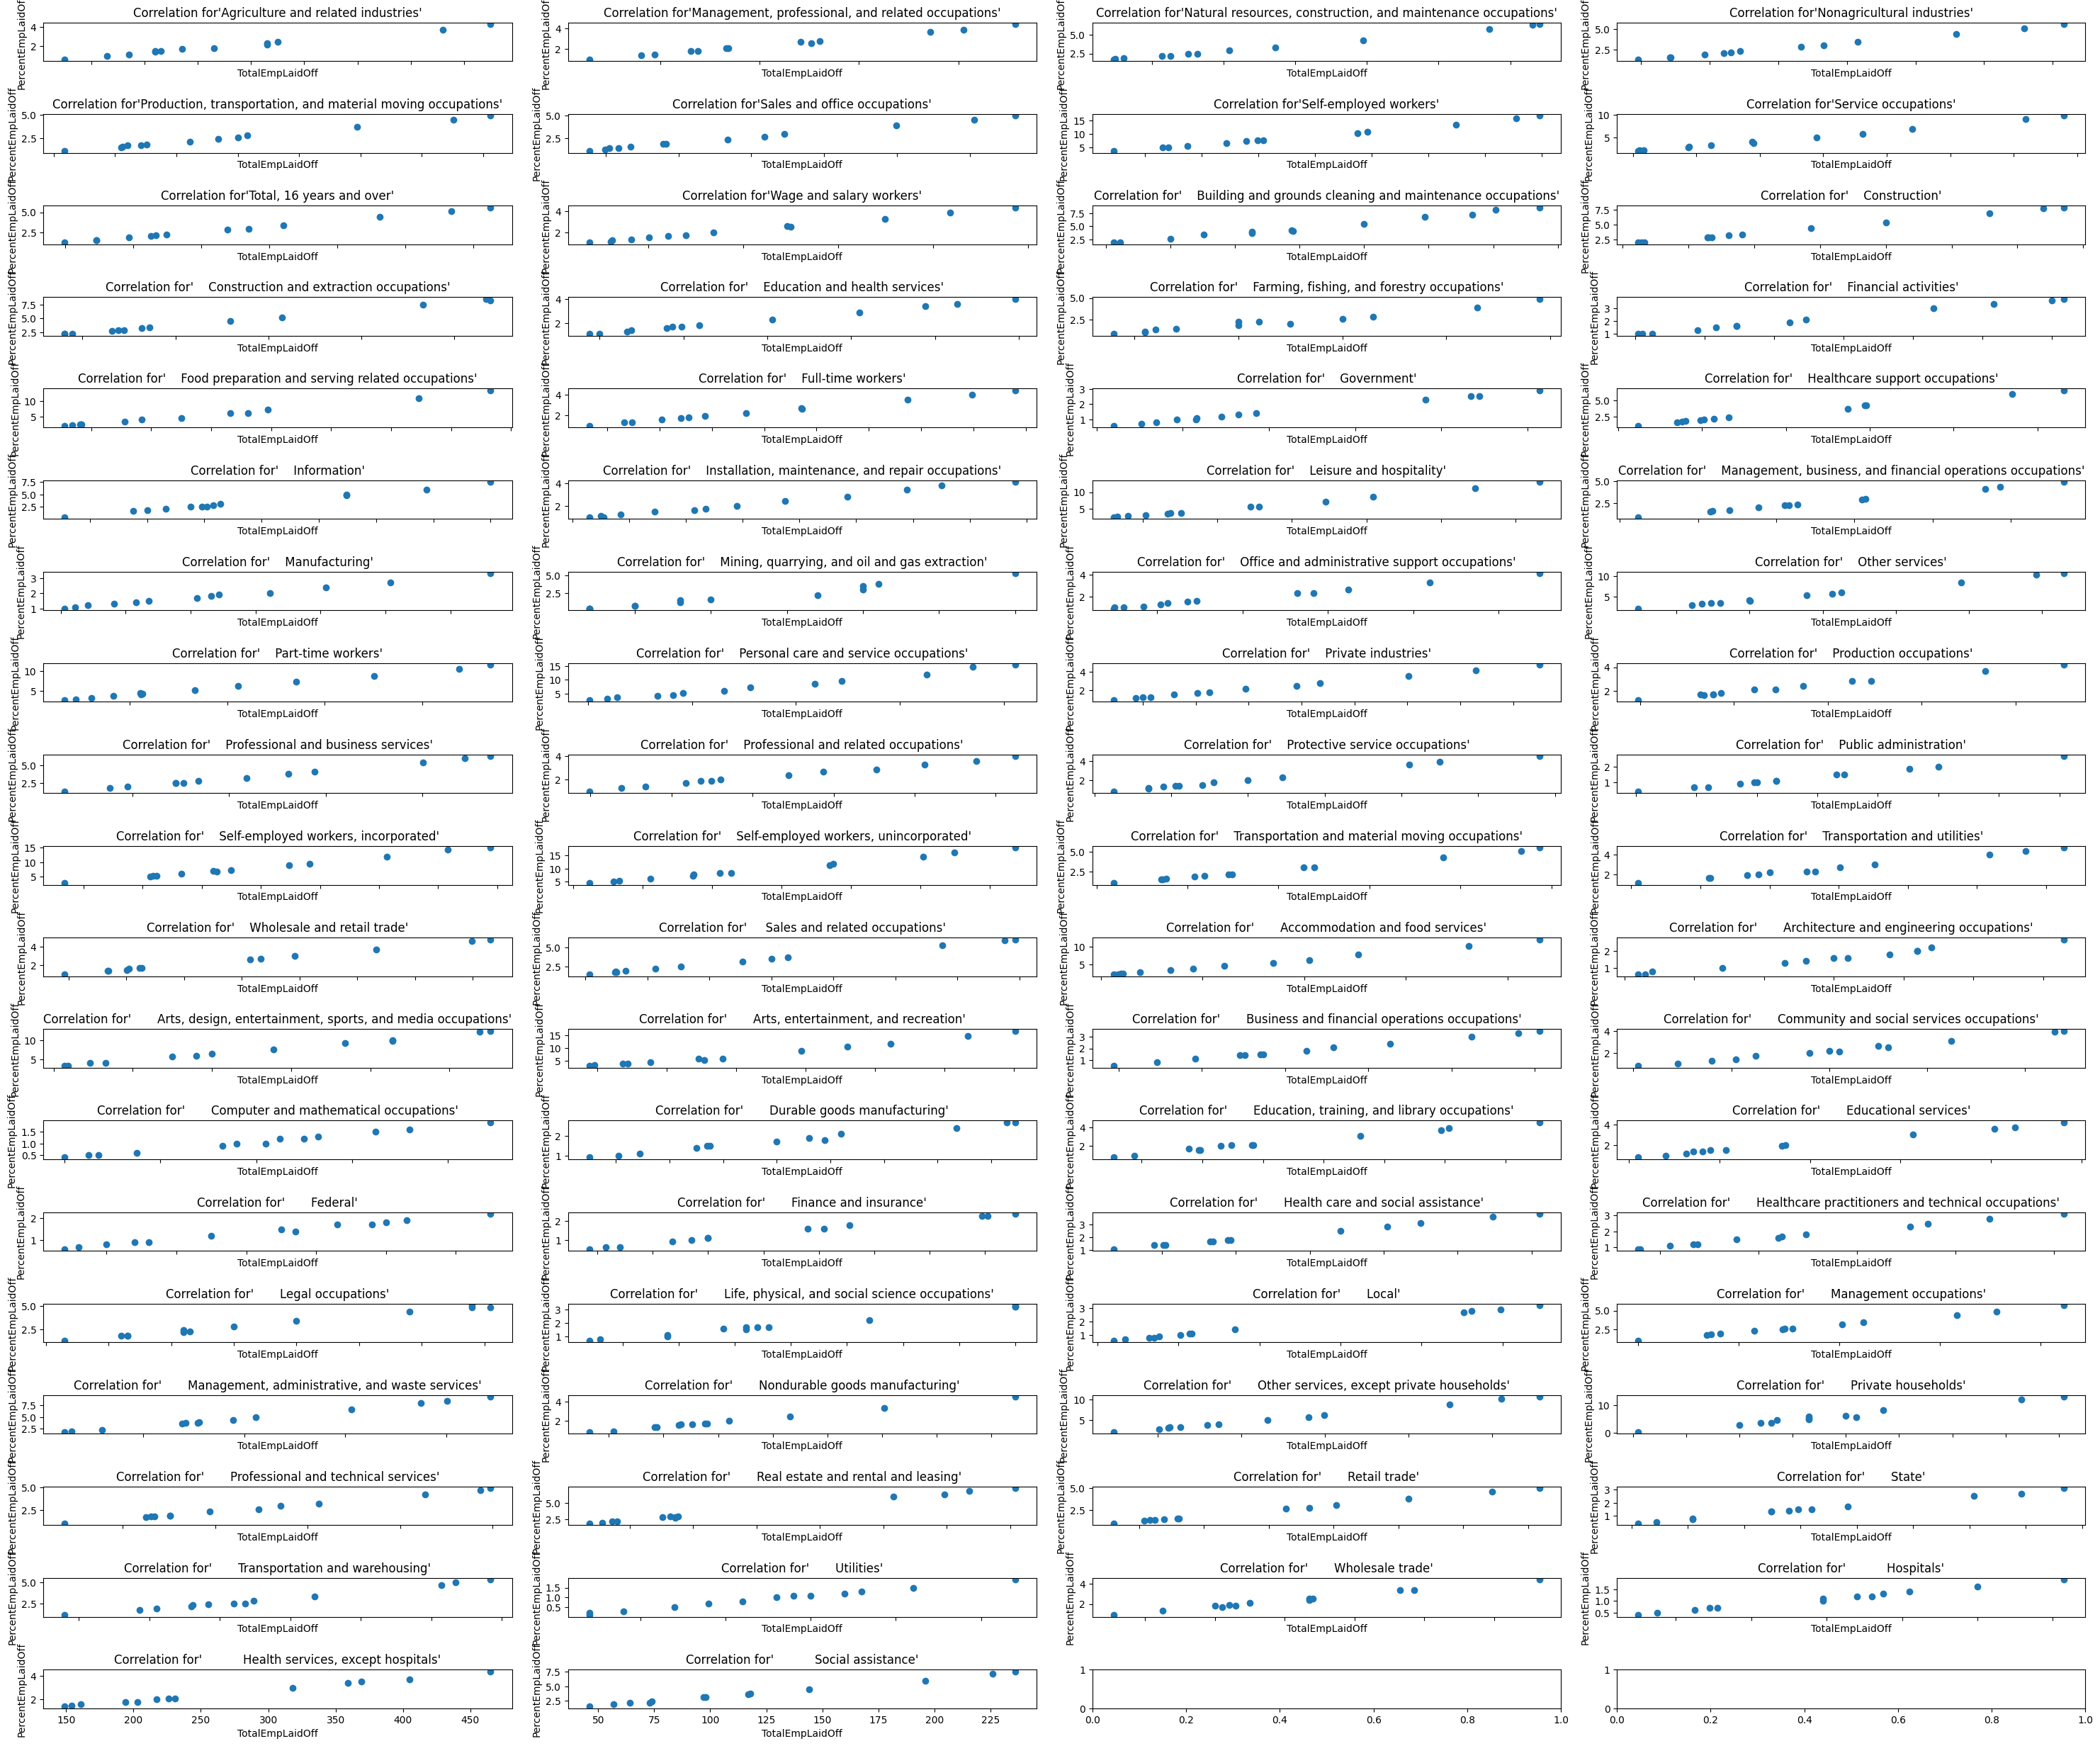

In [18]:


# Create a grid of subplots with 4 plots in each row
fig, axes = plt.subplots(nrows=len(grouped)//4+1, ncols=4, figsize=(30, 25))

# Iterate over the rows and columns of the subplot grid
for i in range(len(grouped)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    # Get the name and data of the current group
    name, group = list(grouped)[i]
    
    # Plot the data points on the current subplot
    ax.scatter(group['TotalEmpLaidOff'], group['PercentEmpLaidOff'])
    
    # Set the plot title and axis labels
    ax.set_title(f"Correlation for'{name}'")
    ax.set_xlabel('TotalEmpLaidOff')
    ax.set_ylabel('PercentEmpLaidOff')

    # Hide the x-axis labels for all but the bottom row
    if row < len(grouped)//4:
        plt.setp(ax.get_xticklabels(), visible=False)

# Adjust the layout of the subplots and the spacing between them
plt.tight_layout(pad=2)

# Display the plot
plt.show()


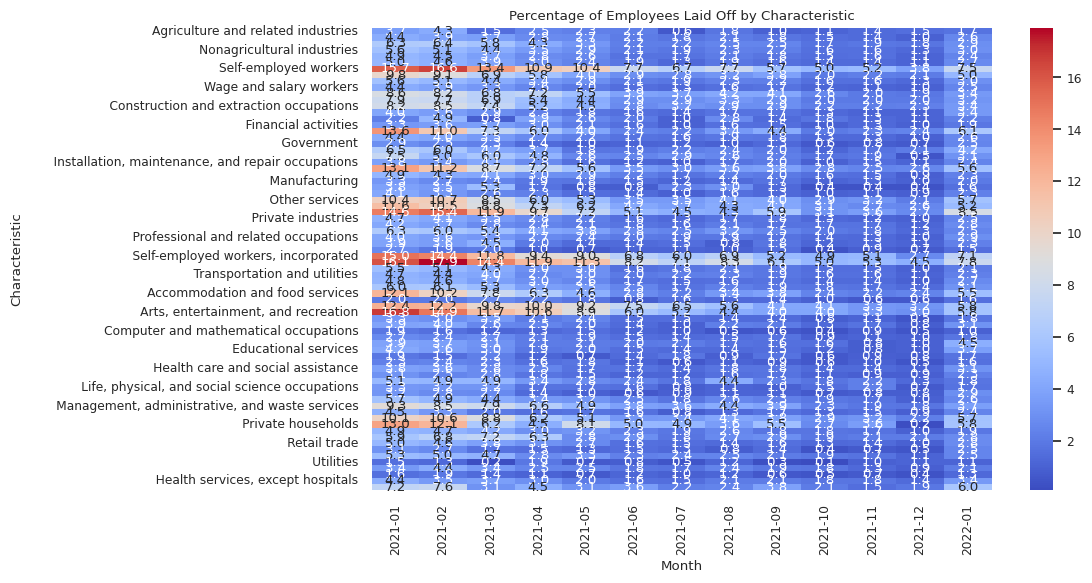

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a pivot table to summarize data by Characteristic
df_pivot = pd.pivot_table(df, values='PercentEmpLaidOff', index=['Characteristic'], columns=['Month'])

# Create heatmap using Seaborn
sns.set(font_scale=0.8)
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Percentage of Employees Laid Off by Characteristic')
plt.show()


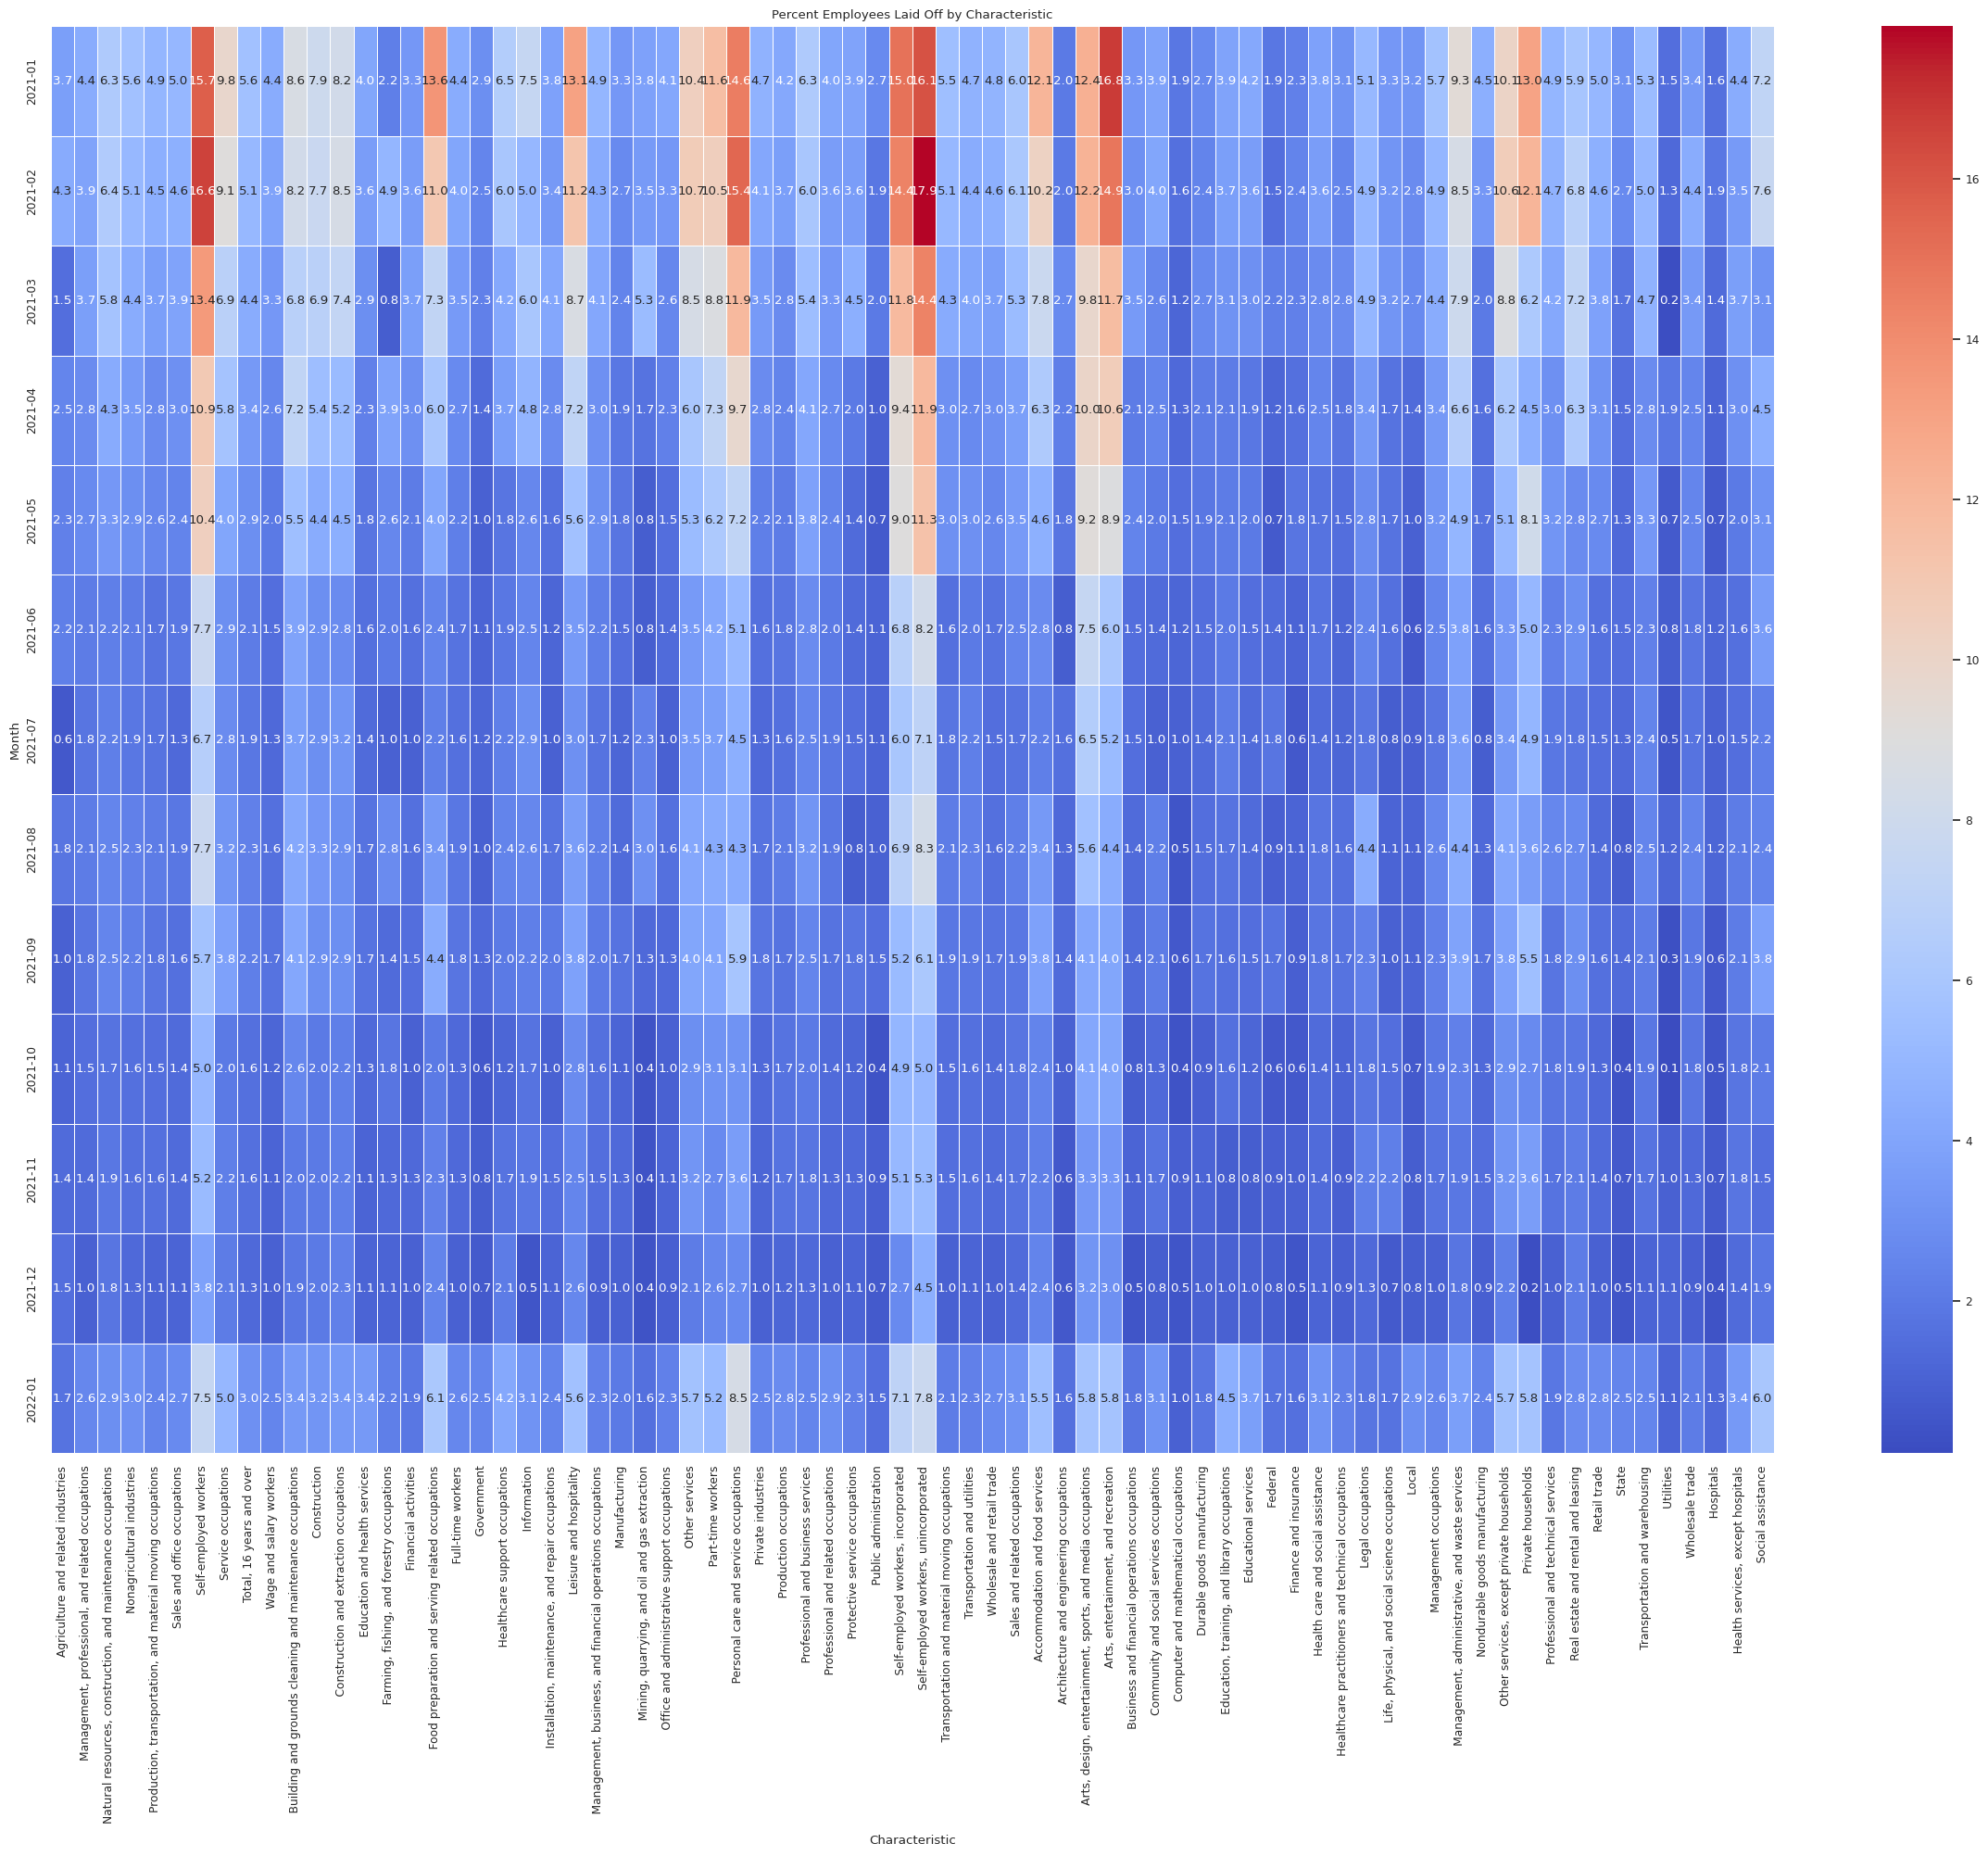

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot table
table = pd.pivot_table(df, values='PercentEmpLaidOff', index=['Month'], columns=['Characteristic'])

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.4)
plt.title('Percent Employees Laid Off by Characteristic')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot table
table = pd.pivot_table(df, values='PercentEmpLaidOff', index=['Month'], columns=['Characteristic'])

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.4)
plt.title('Percent Employees Laid Off by Characteristic')
plt.show()